<a href="https://colab.research.google.com/github/ImmaculateOkoruwa/TechWise-Machine-Learning-Project/blob/main/Predicting_Bank_Customer_Churn_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicting Bank Customer Churn Rate**

### **Problem Statement:**

This project utilizes machine learning algorithms to analyze customer data and predict the likelihood of churn, empowering financial institutions with actionable insights. By identifying key drivers of customer attrition and forecasting churn probabilities, the project offers a foundation for proactive retention strategies.

### **Dataset Description:**

The Kaggle dataset contains the following attributes:

* `Customer ID`: The unique identifier assigned to each individual customer.
* `Surname`: The surname of the customer.
* `Credit Score`: A number depicting the customer’s credithworthiness.
* `Geography`: The country where the customer primarily banks.
* `Gender`: The gender the customer identifies with.
* `Age`: The age of the customer, measured in years.
* `Tenure`: The number of years the customer has been with the bank.
* `Balance`: The current amount available in the customer’s bank account.
* `Number of Products`: The number of products the customer has purchased from the bank.
* `Has Credit Card`: Indicates whether the customer possesses a credit card issued by the bank.
* `Active Member`: Indicates if the customer is currently active or inactive with the bank.
* `Estimated Salary`: The bank's estimation of the customer’s annual income.
* `Exited`: A binary indicator of whether the customer has left the bank (1) or is still a customer (0).

### **Possible Deliverables:**


- Data preprocessing.
- EDA findings, including visualizations.
- Data splitting
- Model selection, training, and evaluation details.
- Model performance metrics and insights.
- Conclusion and recommendations.



# **Data preprocessing**

In [ ]:
# Data Manipulation Library
import pandas as pd
import numpy as np
pd.set_option("display.max.columns",None)

# Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Ignore Warnings Library
import warnings
warnings.filterwarnings('ignore')

**Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in csv files
train_df = pd.read_csv('/content/drive/My Drive/train.csv')
test_df  = pd.read_csv('/content/drive/My Drive/test.csv')
submission_df = pd.read_csv('/content/drive/My Drive/sample_submission.csv')
main_df = pd.read_csv('/content/drive/My Drive/Churn_Modelling.csv')


In [ ]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [ ]:
main_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0




1.  **Analyzing the Dimensional Attributes of the Dataset**



In [ ]:
# Display the dimensions of the datasets
print("Shape of the training dataset:", train_df.shape)
print("Shape of the testing dataset:", test_df.shape)
print("Shape of the main dataset:", main_df.shape)

Shape of the training dataset: (165034, 14)
Shape of the testing dataset: (110023, 13)
Shape of the main dataset: (10002, 14)


**Observation**


*  The training dataset consists of a total of 165,034 records and 14 columns.
*  The testing dataset consists of a total of 110,023 records and 13 columns.
*  The main dataset consists of a total of 10,002 records and 14 columns.



2.  **Summary of Dataset**



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


**Observation**


*  The dataset is both numerical and categorical.

3.  **Removing attributes that do not provide any meaningful insights for our analysis.**

In [ ]:
# Define the columns to be dropped
columns_to_remove = ["id", "CustomerId", "Surname"]

# Drop the specified columns from the training and testing datasets
train_df.drop(columns=columns_to_remove, inplace=True)
test_df.drop(columns=columns_to_remove, inplace=True)

# Remove additional columns from the main dataset
main_df.drop(columns=["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

4.  **Combining Two Datasets**

In [ ]:
# Print the shapes of the main and training datasets
print(main_df.shape, train_df.shape)

# Concatenate the main dataset to the training dataset along rows (axis=0)
train_df = pd.concat([train_df, main_df], axis=0)

# Print the new shape of the training dataset after concatenation
train_df.shape

(10002, 11) (165034, 11)


(175036, 11)

5.  **Checking for Null values in the dataset**

In [ ]:
# Check for null values in the training and testing datasets
print("Null values in the training dataset:")
print(train_df.isnull().sum())

print("\nNull values in the testing dataset:")
print(test_df.isnull().sum())

Null values in the training dataset:
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

Null values in the testing dataset:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64


**Observation**

*   The training dataset has very few missing values, so we will simply drop them.
*   There are no missing values in any attribute of the test dataset.



In [ ]:
train_df = train_df.dropna()

6.  **Checking for duplicates in the dataset**

In [ ]:
# Check for duplicates in the training and testing datasets
print("\nDuplicate rows in the training dataset:", train_df.duplicated().sum())
print("Duplicate rows in the testing dataset:", test_df.duplicated().sum())


Duplicate rows in the training dataset: 571
Duplicate rows in the testing dataset: 72


**Observation**


*   The training dataset contains 571 duplicate records, while the testing dataset has 72 duplicate records.





In [ ]:
# Drop duplicate records from the training dataset
train_df.drop_duplicates(inplace=True)

# Drop duplicate records from the testing dataset
test_df.drop_duplicates(inplace=True)

In [ ]:
# Display the dimensions of the datasets
print("Shape of the training dataset:", train_df.shape)
print("Shape of the testing dataset:", test_df.shape)

Shape of the training dataset: (174461, 11)
Shape of the testing dataset: (109951, 10)


7.  **Conducting Descriptive Analysis**

In [ ]:
# Descriptive statistics of the training dataset
train_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CreditScore,174461.0,656.12,81.11,350.00,597.00,659.00,710.00,850.00
Age,174461.0,38.17,8.97,18.00,32.00,37.00,42.00,92.00
Tenure,174461.0,5.02,2.81,0.00,3.00,5.00,7.00,10.00
Balance,174461.0,56639.16,62978.19,0.00,0.00,0.00,120723.17,250898.09
NumOfProducts,174461.0,1.55,0.55,1.00,1.00,2.00,2.00,4.00
HasCrCard,174461.0,0.75,0.43,0.00,1.00,1.00,1.00,1.00
IsActiveMember,174461.0,0.50,0.50,0.00,0.00,0.00,1.00,1.00
EstimatedSalary,174461.0,111891.04,50792.48,11.58,73322.68,116971.05,154767.34,199992.48
Exited,174461.0,0.21,0.41,0.00,0.00,0.00,0.00,1.00


**Observation**


*   The minimum age is 18, indicating that all customers are adults.

In [ ]:
# Descriptive statistics for categorical columns in the training dataset
train_df.describe(include="O").T

,count,unique,top,freq
Geography,174461,3,France,98893
Gender,174461,2,Male,98266


In [ ]:
# Check unique values in categorical columns of the training dataset
categorical_cols = train_df.select_dtypes(include='O').columns

for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(train_df[col].unique())
    print()

Unique values in Geography:
['France' 'Spain' 'Germany']

Unique values in Gender:
['Male' 'Female']



**Observation**

*   The Geography attribute contains three unique values: 'France', 'Spain', and 'Germany'.
*   The Gender attribute has two unique values: 'Male' and 'Female'.



# **Exploratory Data Analysis (EDA)**

1.  **Visualizing the Customer Attrition Rate**

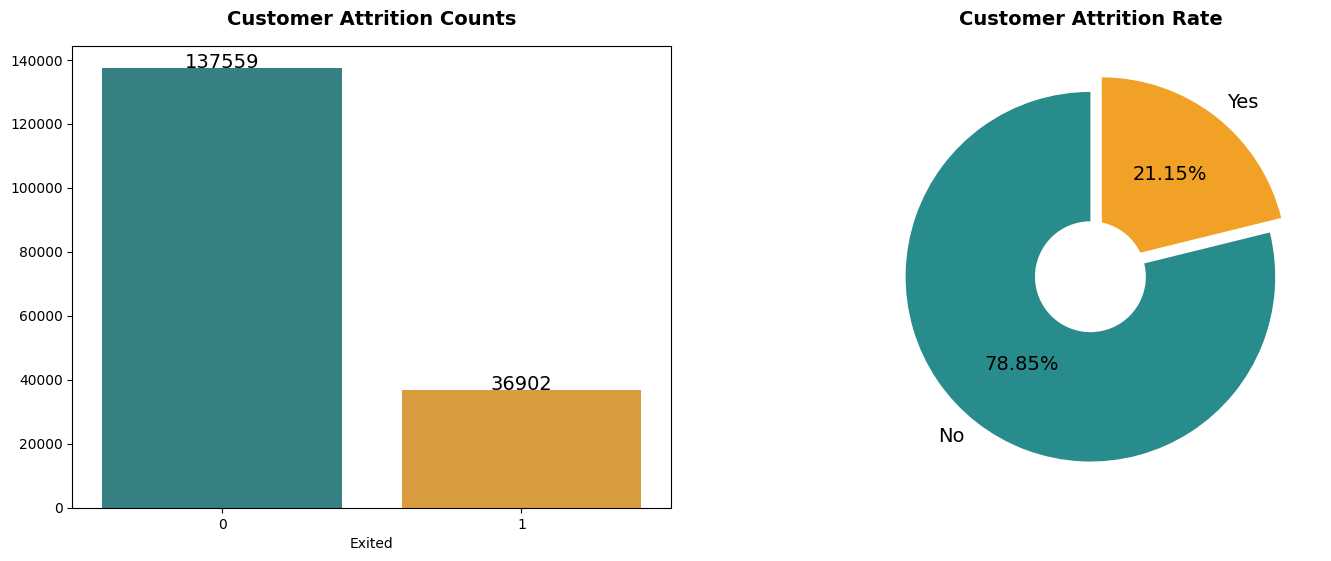

In [ ]:
# Visualization of Customer Attrition in Counts
plt.figure(figsize=(17,6))

# Subplot for attrition counts
plt.subplot(1, 2, 1)
attrition_rate = train_df["Exited"].value_counts()
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette=[ '#298c8c', '#f1a226'])
plt.title("Customer Attrition Counts", fontweight="black", size=14, pad=15)

# Add value labels on the bar chart
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v, ha="center", fontsize=14)

# Visualization of Customer Attrition in Percentage
plt.subplot(1, 2, 2)

# Pie chart for attrition percentage with custom colors (teal and gold)
colors = ['#298c8c', '#f1a226']

plt.pie(attrition_rate, labels=["No", "Yes"], autopct="%.2f%%", textprops={"size": 14},
        colors=colors, explode=[0, 0.1], startangle=90)

# Add a circle at the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Customer Attrition Rate", fontweight="black", size=14, pad=15)

# Display the plot
plt.show()


**Observation**


*   The customer attrition rate for stands at 21.15%, indicating an imbalanced dataset.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def pie_bar_plot(df, col, attrition_col):
    """
    This function generates two plots:
    1. A pie chart showing the distribution of a categorical feature.
    2. A bar chart showing the attrition rate for each category of the feature.

    Parameters:
    df (DataFrame): The input dataframe.
    col (str): The categorical column to visualize.
    attrition_col (str): The column indicating attrition (binary, where 1 represents attrition).
    """
    plt.figure(figsize=(14, 6))

    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    # First subplot: Pie chart
    plt.subplot(1, 2, 1)
    colors = sns.color_palette('Set2', len(value_counts))
    plt.pie(value_counts, labels=value_counts.index, autopct="%.1f%%", startangle=90,
            colors=colors, textprops={"size":14}, pctdistance=0.75)
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.title(f"Distribution by {col}", fontweight="bold", size=14, pad=15)

    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)

    # Create a new column with 'Yes'/'No' for attrition based on the attrition column
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    # Value counts for attrition and the categorical column
    value_attrition = df[df['attrition_label'] == 'Yes'][col].value_counts().sort_index()
    value_all = value_counts

    # Calculate attrition rate for each category
    attrition_rate = (value_attrition / value_all) * 100

    sns.barplot(x=value_all.index, y=value_attrition.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="bold", size=14, pad=15)

    # Add text annotations for attrition counts and percentages
    for i, val in enumerate(value_attrition.values):
        percentage = attrition_rate.values[i]
        plt.text(i, val, f"{val} ({percentage:.1f}%)", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

# Example usage:
# pie_bar_plot(your_dataframe, 'Geography', 'Exited')


2.  **Examining Customer Attrition Based on Gender**

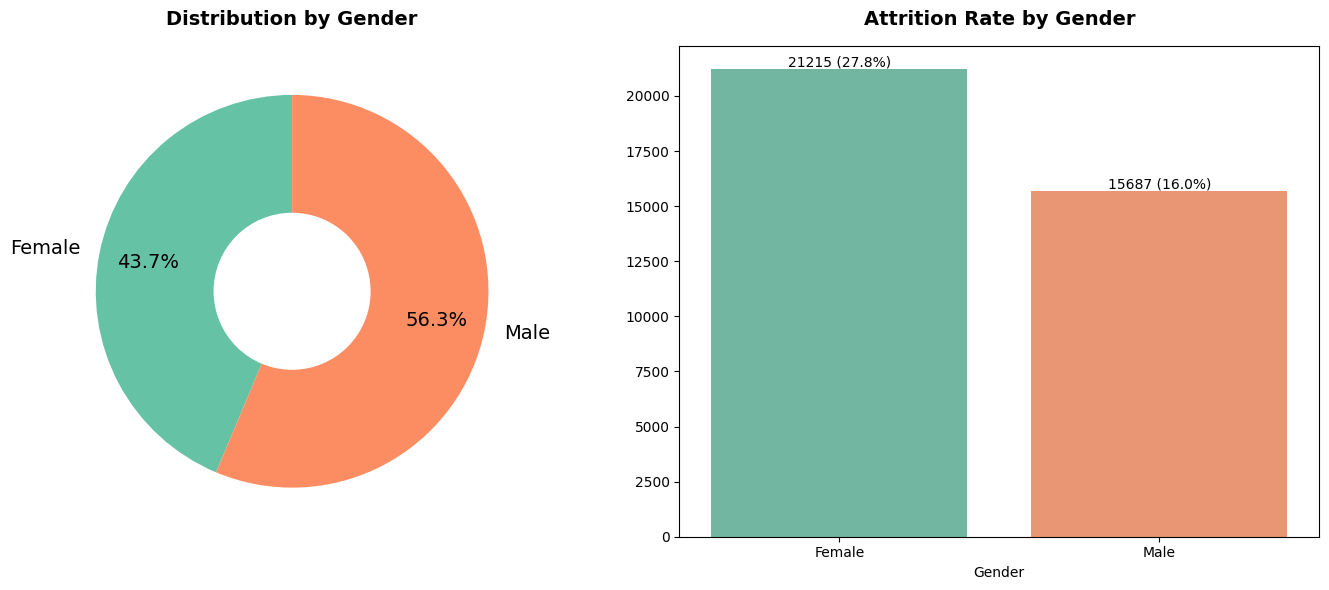

In [ ]:
pie_bar_plot(train_df, 'Gender', 'Exited')

**Observation**


*   Males make up a larger portion of the customer base (56.3%) compared to females (43.7%).
*   Female customers have a higher attrition rate at 27.8%, compared to 16.0% for male customers.



3.  **Examining Customer Attrition Based on Geography**

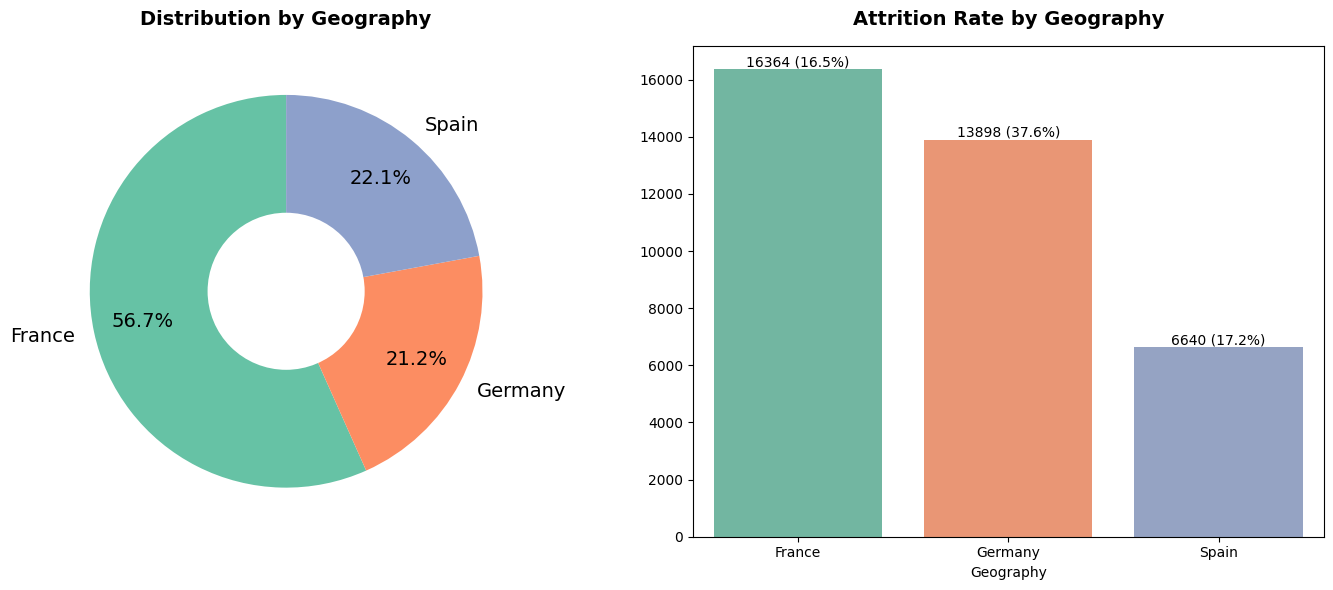

In [ ]:
pie_bar_plot(train_df, 'Geography', 'Exited')

**Observation**


*   Germany exhibits the highest attrition rate despite having a relatively small share of the total distribution compared to France.
*    France has the largest distribution, yet its attrition rate is lower than Germany’s.
*   Spain's attrition rate is similar to France's but has a smaller total count.




4.  **Examining Customer Attrition Based on Tenure**

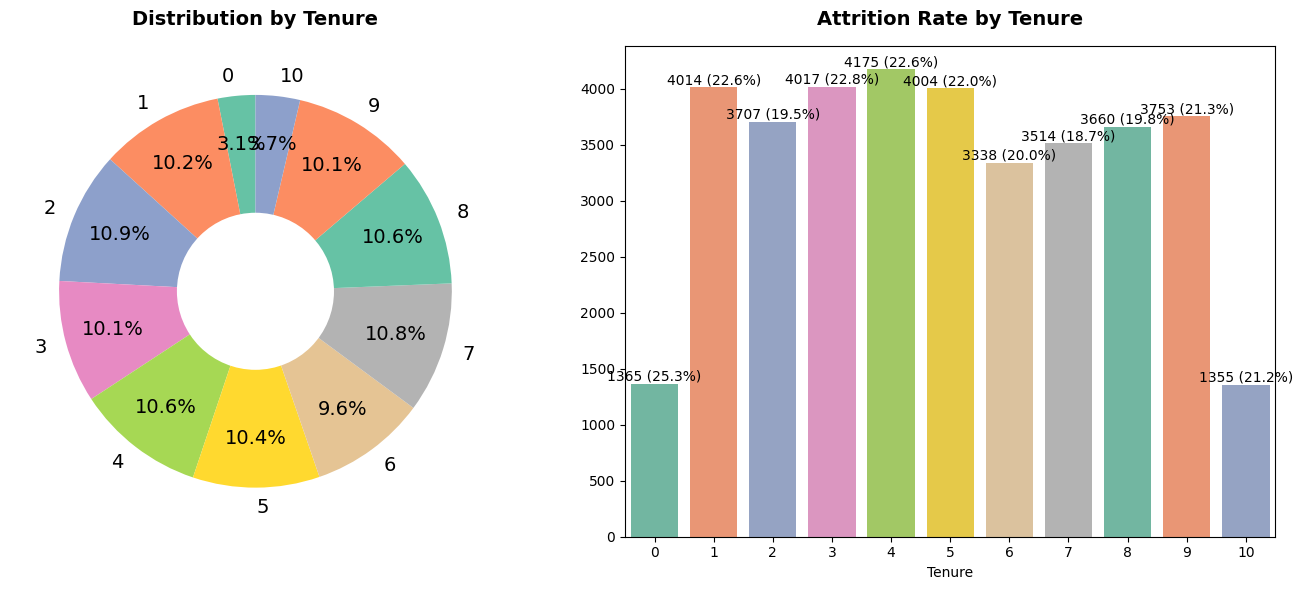

In [ ]:
pie_bar_plot(train_df, 'Tenure', 'Exited')

**Observation**


*   The attrition rate is fairly consistent across all tenure categories, ranging between 19% and 22%, except for 0 tenure, which has the highest rate at 25%.



5.  **Examining Customer Attrition Based on HasCrCard**

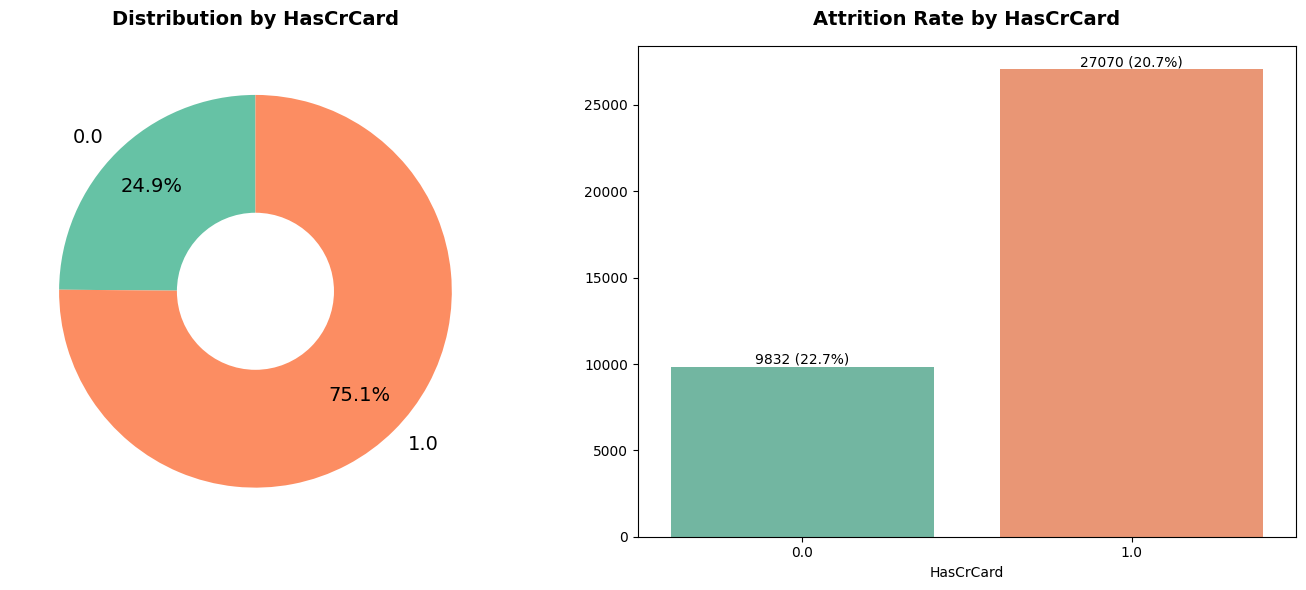

In [ ]:
pie_bar_plot(train_df, 'HasCrCard', 'Exited')

**Observation**




*   75% of customers own a credit card, while 25% do not.
*   Both groups exhibit a similar attrition rate of 20-22%.
*   No meaningful correlation between credit card ownership and attrition is observed.



6. **Examining Customer Attrition Based on IsActiveMember**

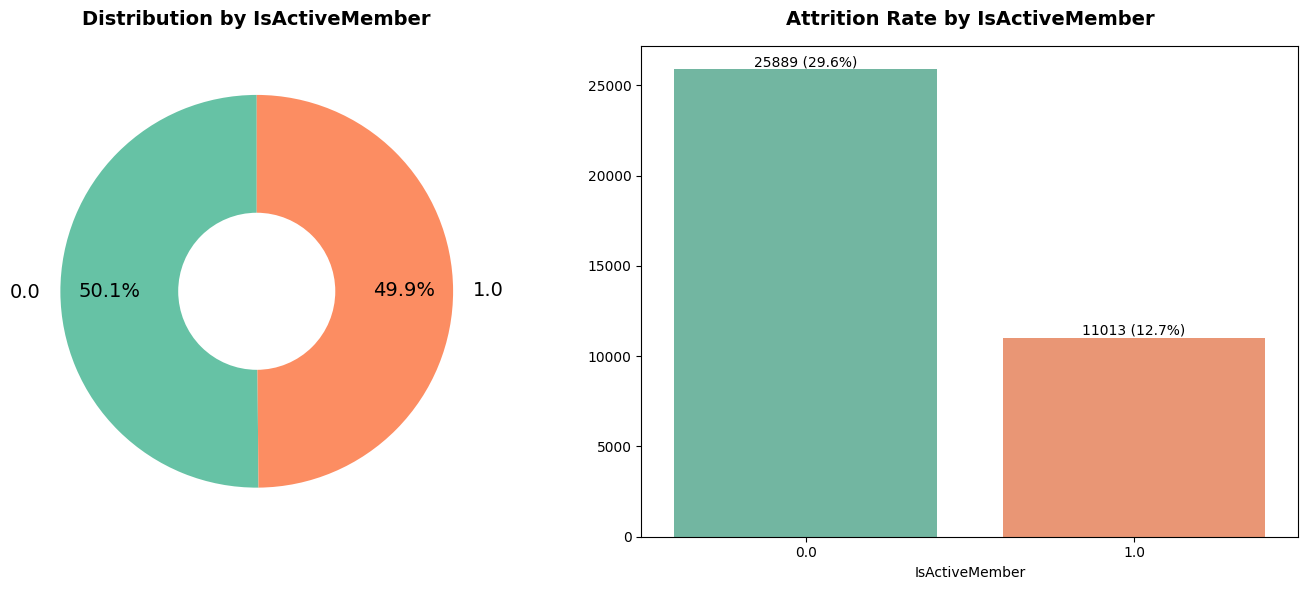

In [ ]:
pie_bar_plot(train_df, 'IsActiveMember', 'Exited')

**Observation**


*   50.1% of customers are not active members, with an attrition rate of 29%.
*   49.9% are active members, with a significantly lower attrition rate of 12%.
*   Inactive members are more likely to leave compared to active members.



7.  **Examining Customer Attrition Based on Age**

In [ ]:
import matplotlib.ticker as ticker

def hist_with_hue(df, col, attrition_col):
    plt.figure(figsize=(13.5, 6))

    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue='attrition_label', data=df, kde=True, palette='Set2')

    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align

    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x='attrition_label', y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {attrition_col}", fontweight="black", size=14, pad=10)

    plt.tight_layout()
    plt.show()

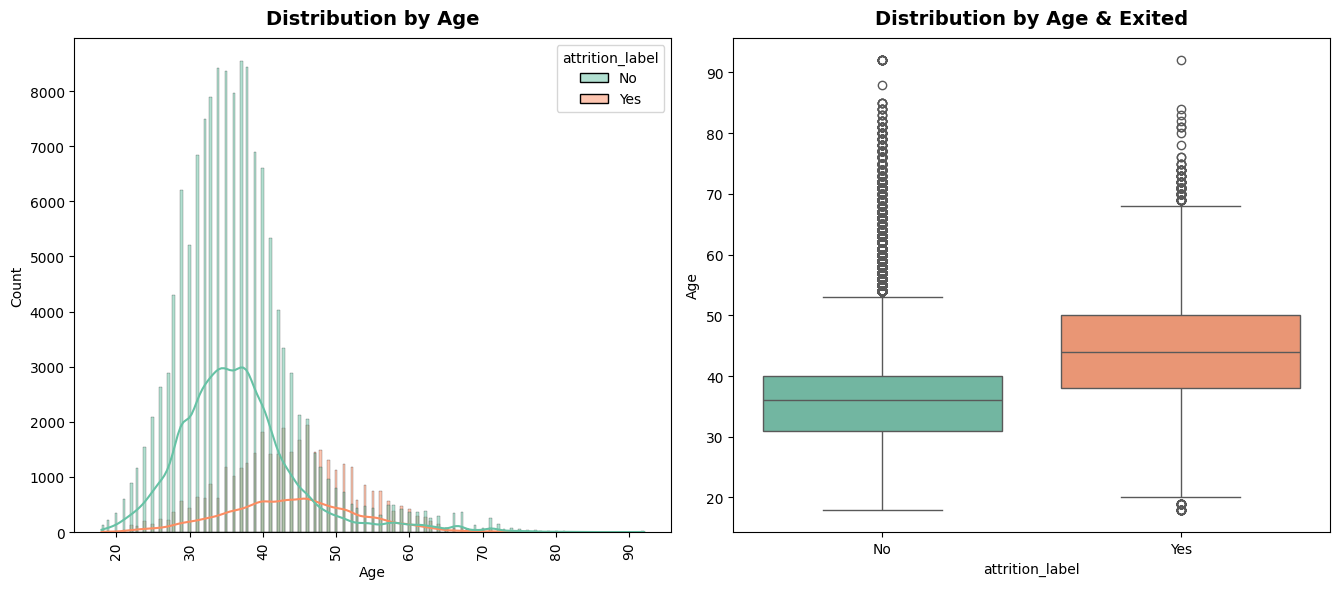

In [ ]:
hist_with_hue(train_df, 'Age', 'Exited')

**Observation**


*   The majority of customers are between the ages of 30 and 40.
*   However, the attrition is most prominent among customers aged between 35 and 50.



8.  **Examining Customer Attrition Based on Credit Score**

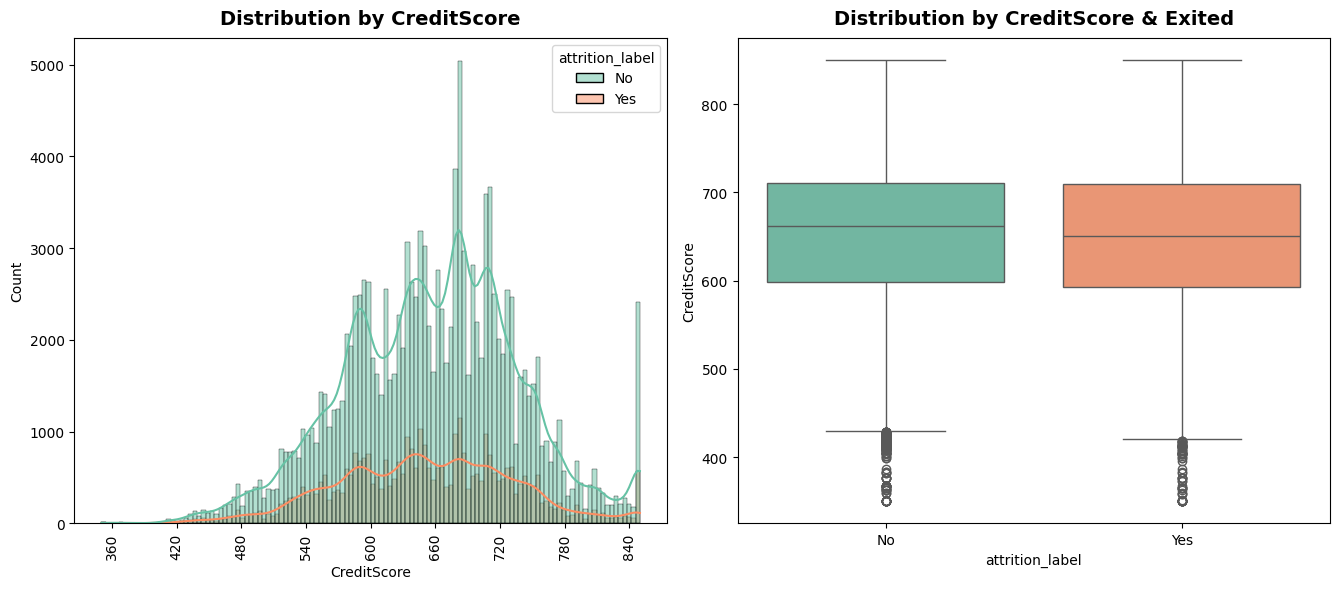

In [ ]:
hist_with_hue(train_df, 'CreditScore', 'Exited')

**Observation**


*   Most customers have a credit score between 600 and 700.
*   There is no significant correlation between credit score and attrition observed.



9.  **Examining Customer Attrition Based on Balance**

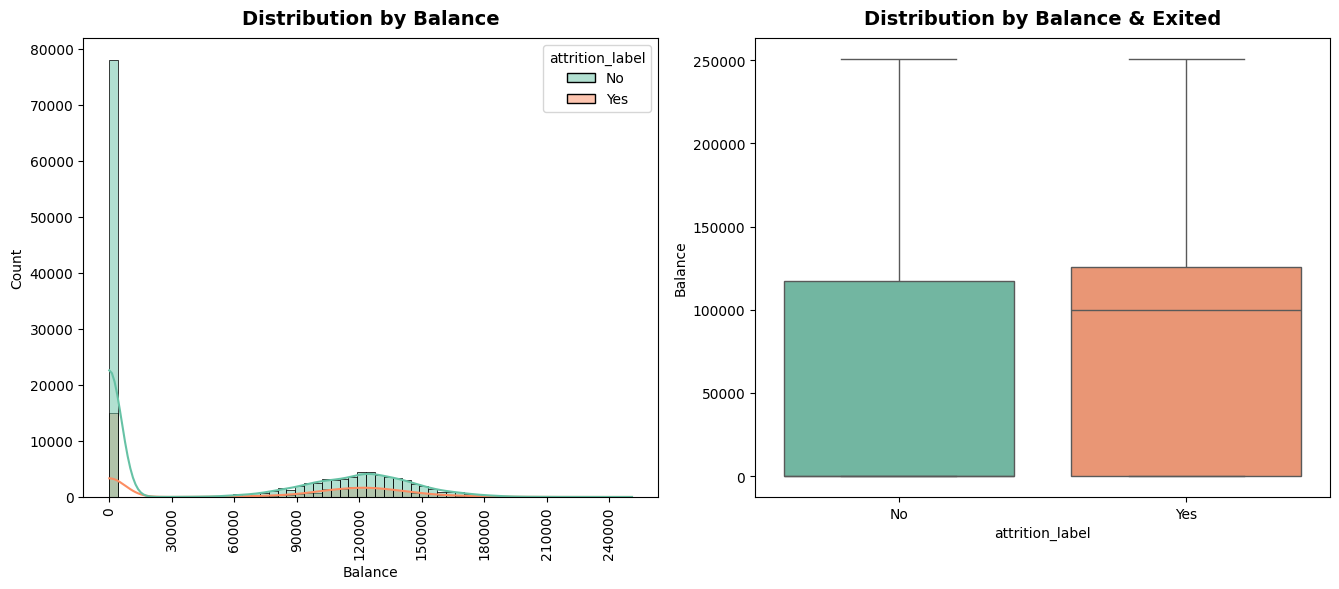

In [ ]:
hist_with_hue(train_df, 'Balance', 'Exited')

**Observation**


*   Most customers have an account balance of less than 1,000.
*   There is no significant correlation observed between account balance and attrition.

10. **Examining Customer Attrition Based on EstimatedSalary**

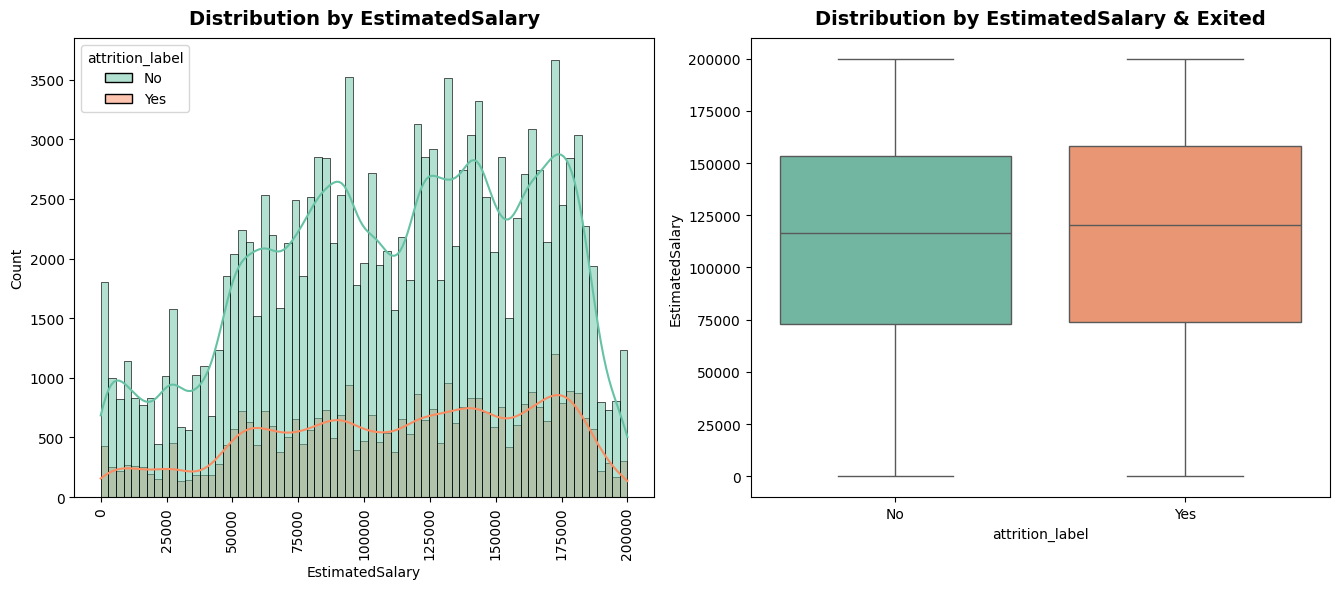

In [ ]:
hist_with_hue(train_df, 'EstimatedSalary', 'Exited')

**Observation**


*   There is no significant correlation observed between Estimated Salary and attrition.



11. **Examining Customer Attrition Based on NumOfProducts**

In [ ]:
def count_percent_plot(df, col, attrition_col):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Convert integer attrition column to 'Yes' and 'No'
    df['attrition_label'] = np.where(df[attrition_col] == 1, 'Yes', 'No')

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df['attrition_label'] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

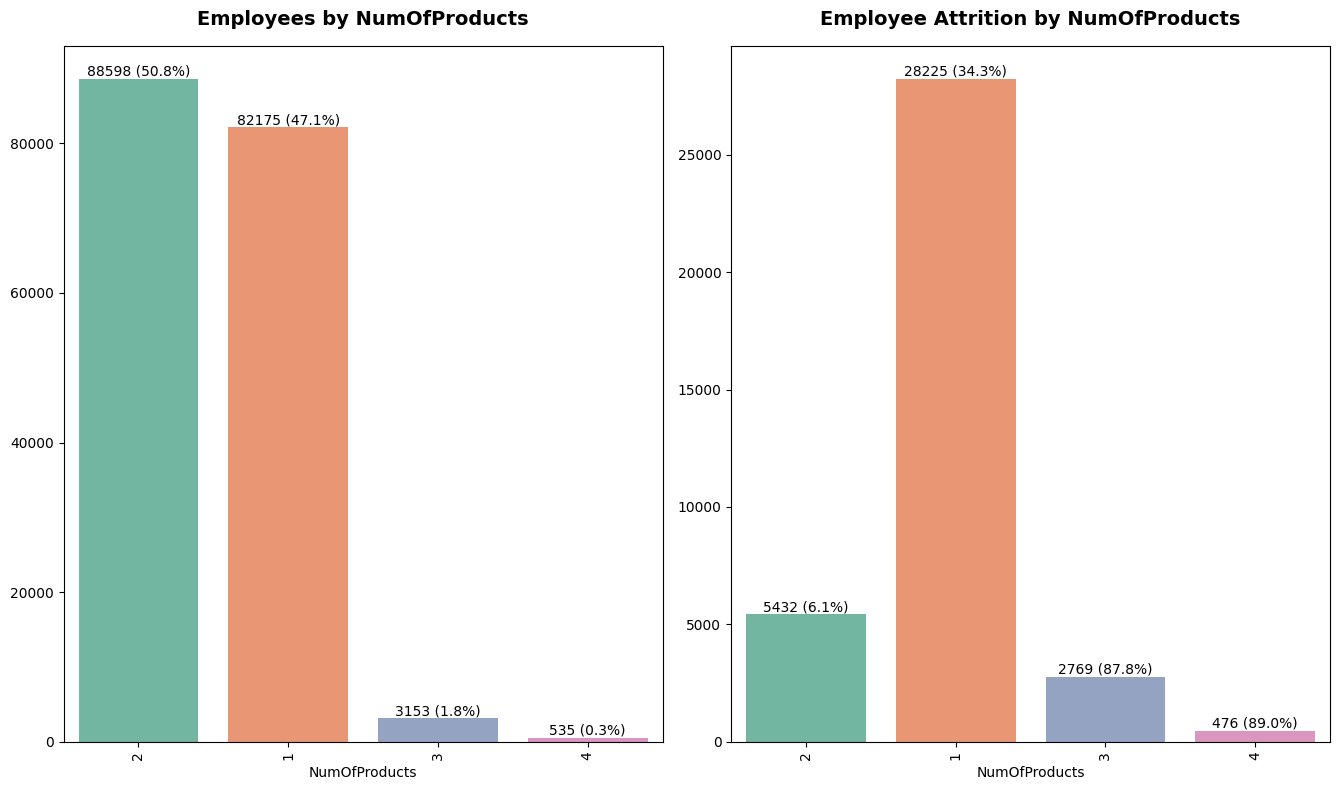

In [ ]:
count_percent_plot(train_df,'NumOfProducts','Exited')

**Observation**


*   50.8% of customers have 2 products, with a low attrition rate of 6.1%.
*   47.1% of customers have 1 product, with a significantly higher attrition rate of 34.3%.
*   1.8% of customers have 3 products, showing a very high attrition rate of 88.8%.
*   0.3% of customers have 4 products, with the highest attrition rate of 89%.



In [ ]:
# Dropping the column attrition_label as it was created solely for analysis purposes:
train_df.drop(['attrition_label'], axis=1, inplace=True)

**Conclusion from EDA**


*   The dataset has an imbalanced target variable with an attrition rate of 21.15%. This will need to be addressed in the modeling process, either by:


1.   Using techniques like oversampling (SMOTE) or undersampling to balance the dataset.
2.   Using evaluation metrics like F1 Score, Precision-Recall AUC, or ROC-AUC instead of accuracy.


*   Retain features such as Gender, Geography, Age, Tenure, Active Membership, and Number of Products for modeling, as they show a strong correlation with attrition.
*   Consider dropping features like Credit Score, Credit Card Ownership, Account Balance, and Estimated Salary to minimize noise and improve model efficiency.



## Base Model

**Encoding**

In [ ]:
train_df["Gender"] = train_df["Gender"].replace({"Female":0 ,"Male":1})
test_df["Gender"] = test_df["Gender"].replace({"Female":0 ,"Male":1})

In [ ]:
# Using pandas get_dummies for one-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=['Geography'], prefix='geo')
test_df_encoded = pd.get_dummies(test_df, columns=['Geography'], prefix='geo')

In [ ]:
# Convert specific boolean columns to integer (1 and 0)
columns_to_convert = ['geo_France', 'geo_Germany', 'geo_Spain']
for col in columns_to_convert:
    train_df_encoded[col] = train_df_encoded[col].astype(int)
    test_df_encoded[col] = test_df_encoded[col].astype(int)

**Correlation Matrix**

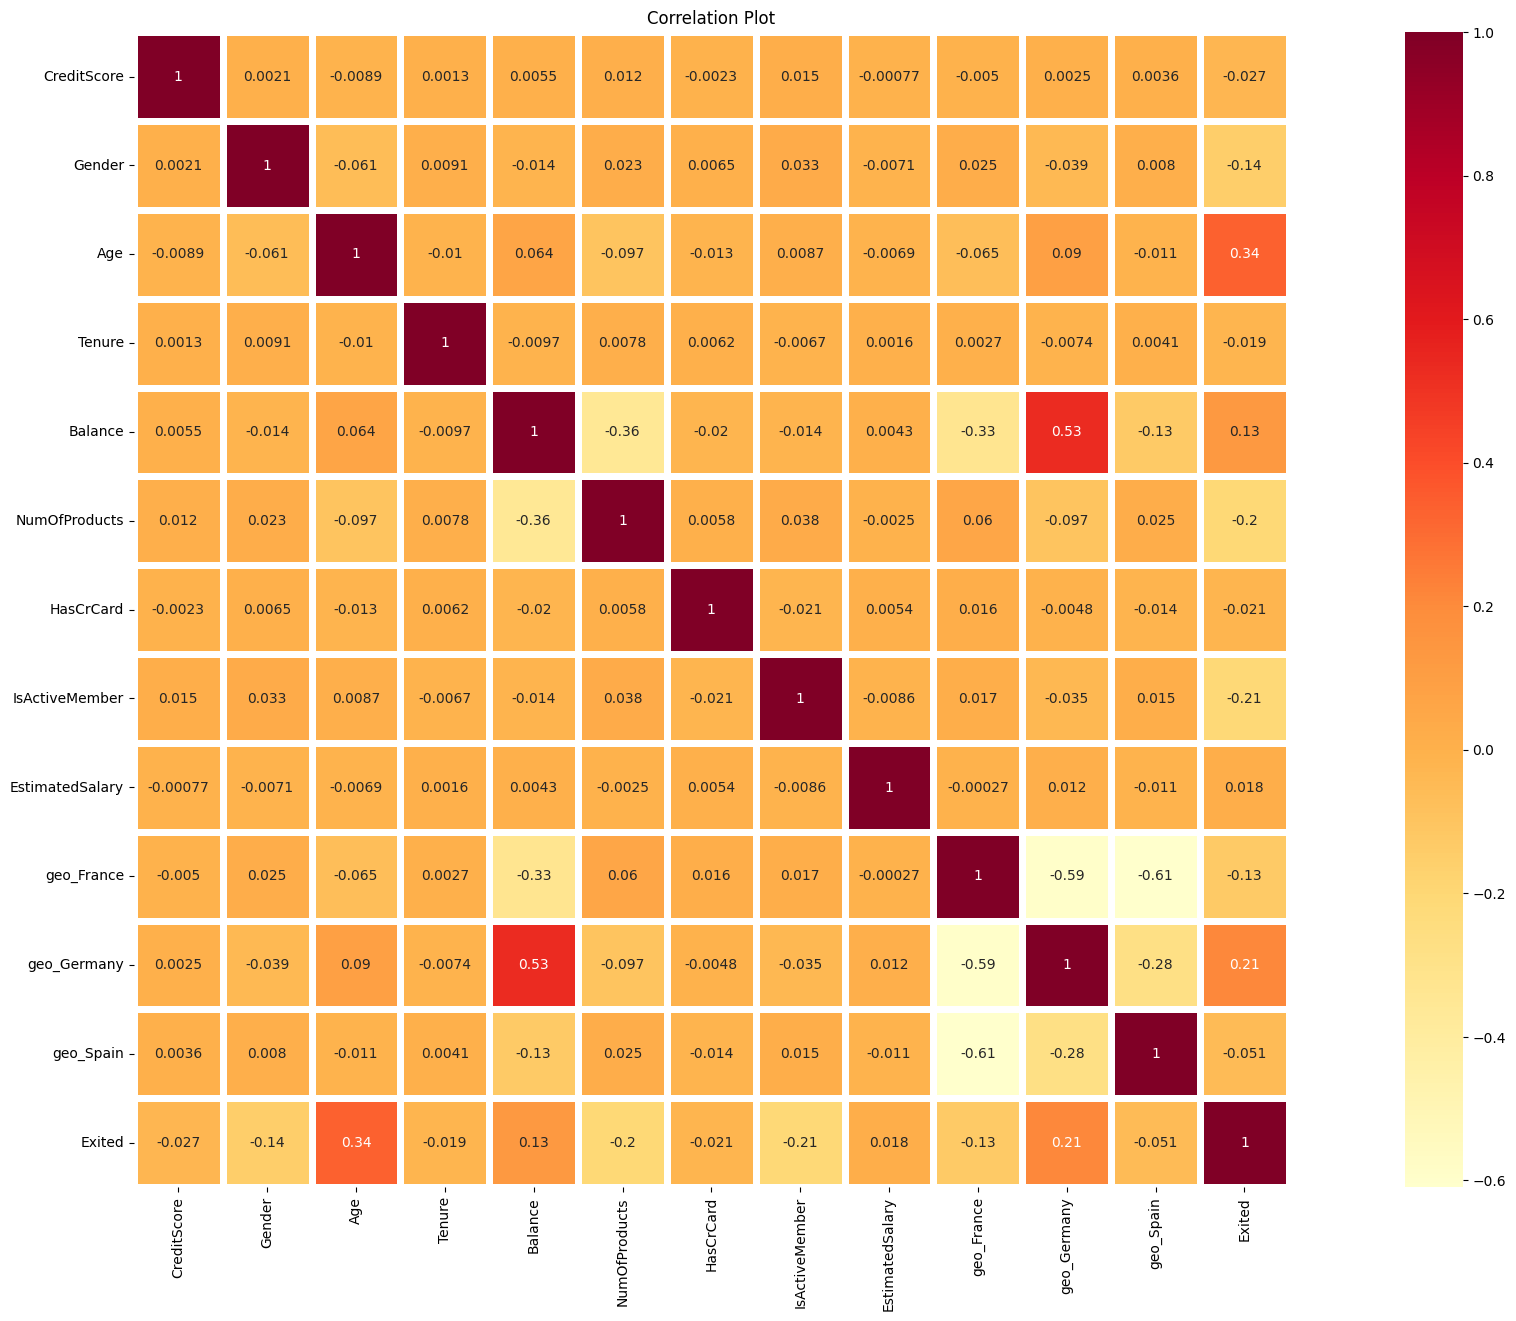

In [ ]:
# Reorder columns to ensure 'Exited' is last
cols = list(train_df_encoded.columns)
cols.remove('Exited')
cols.append('Exited')
train_df_encoded = train_df_encoded[cols]


plt.figure(figsize=(30, 15))
plt.title("Correlation Plot")
sns.heatmap(train_df_encoded.corr(), linewidths=5, annot=True, square=True, annot_kws={'size': 10}, cmap='YlOrRd')
plt.show()

**Observation**


*   No highly correlated features found.

In [ ]:
X = train_df_encoded.drop('Exited', axis=1)
y = train_df_encoded['Exited']

In [ ]:
#data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training and evaluating model: Random Forest
Model: Random Forest
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     27562
           1       0.71      0.54      0.61      7331

    accuracy                           0.86     34893
   macro avg       0.80      0.74      0.76     34893
weighted avg       0.85      0.86      0.85     34893


---------------------------------------------



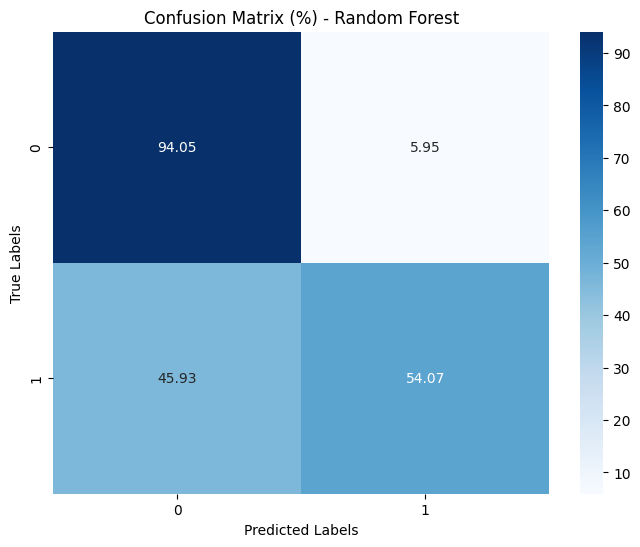

Training and evaluating model: Logistic Regression
Model: Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     27562
           1       0.69      0.38      0.49      7331

    accuracy                           0.83     34893
   macro avg       0.77      0.67      0.69     34893
weighted avg       0.82      0.83      0.81     34893


---------------------------------------------



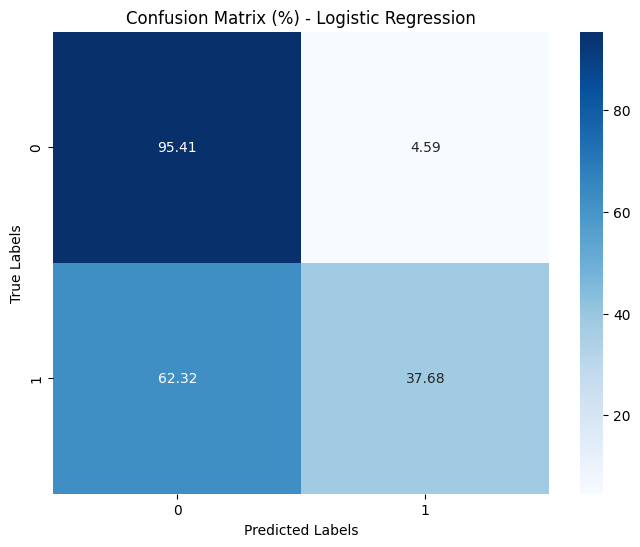

Training and evaluating model: Decision Tree
Model: Decision Tree
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     27562
           1       0.51      0.53      0.52      7331

    accuracy                           0.79     34893
   macro avg       0.69      0.70      0.69     34893
weighted avg       0.80      0.79      0.80     34893


---------------------------------------------



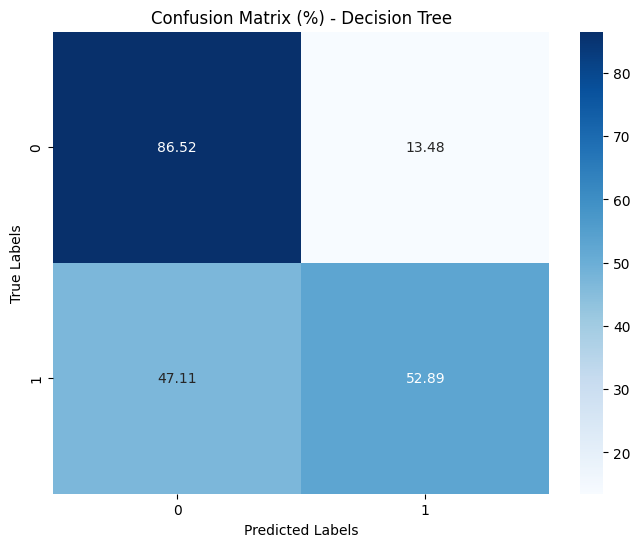

Training and evaluating model: Gradient Boosting
Model: Gradient Boosting
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     27562
           1       0.75      0.54      0.63      7331

    accuracy                           0.86     34893
   macro avg       0.82      0.74      0.77     34893
weighted avg       0.86      0.86      0.86     34893


---------------------------------------------



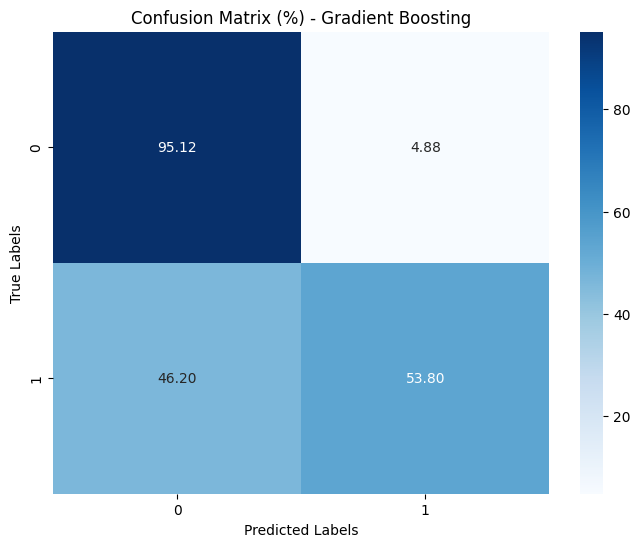

Training and evaluating model: AdaBoost
Model: AdaBoost
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     27562
           1       0.73      0.53      0.61      7331

    accuracy                           0.86     34893
   macro avg       0.80      0.74      0.76     34893
weighted avg       0.85      0.86      0.85     34893


---------------------------------------------



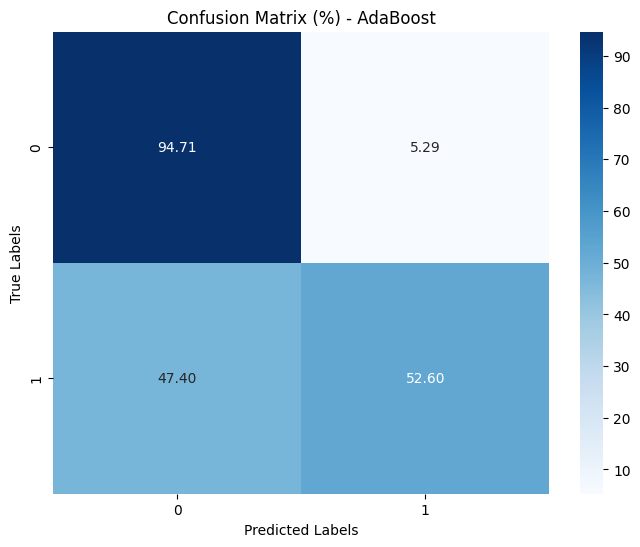

Training and evaluating model: XGBoost
Model: XGBoost
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     27562
           1       0.73      0.56      0.64      7331

    accuracy                           0.86     34893
   macro avg       0.81      0.75      0.78     34893
weighted avg       0.86      0.86      0.86     34893


---------------------------------------------



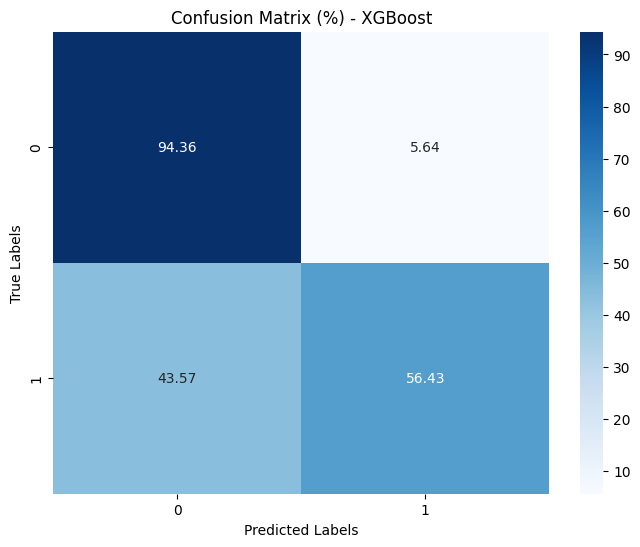

Training and evaluating model: LightGBM
[LightGBM] [Info] Number of positive: 29571, number of negative: 109997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 139568, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211875 -> initscore=-1.313659
[LightGBM] [Info] Start training from score -1.313659
Model: LightGBM
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     27562
           1       0.73      0.56      0.63      7331

    accuracy                           0.86     34893
   macro avg       0.81      0.75      0.78     34893
weighted avg       0.86      0.86      0.86     34893


-----------------------------------

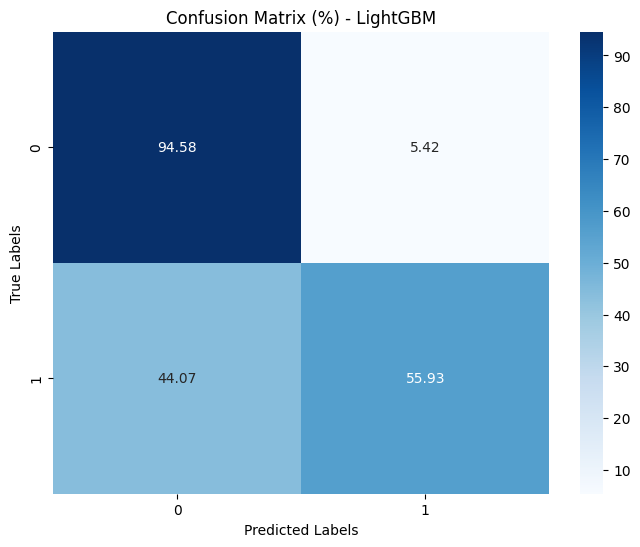

Training and evaluating model: K-Nearest Neighbors
Model: K-Nearest Neighbors
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     27562
           1       0.30      0.12      0.17      7331

    accuracy                           0.76     34893
   macro avg       0.55      0.52      0.51     34893
weighted avg       0.69      0.76      0.71     34893


---------------------------------------------



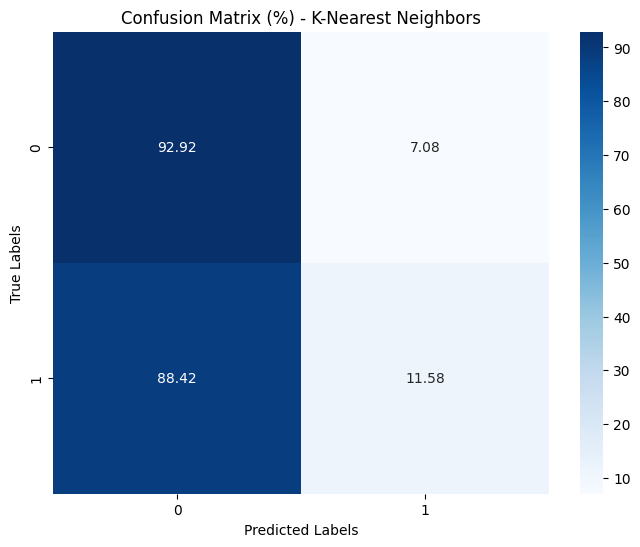

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

# Method to evaluate the performance of the model
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model: {model_name}")
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    print("\n---------------------------------------------\n")

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create a heatmap of the confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percentage, annot=True, cmap='Blues', fmt='.2f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix (%) - {model_name}')

    plt.show()

# Function to train and evaluate multiple models
def evaluate_multiple_models(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        print(f"Training and evaluating model: {model_name}")
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Evaluate the model
        evaluate_model(y_test, y_pred, model_name)

# Define your models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Assuming X_train, X_test, y_train, y_test are already defined
# Call the function to evaluate all models
evaluate_multiple_models(models, X_train, X_test, y_train, y_test)

**Balance the dataset**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

y_sm.value_counts()

,count
Exited,
1,109997
0,109997


Training and evaluating model: Random Forest
Model: Random Forest
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     27562
           1       0.66      0.58      0.62      7331

    accuracy                           0.85     34893
   macro avg       0.78      0.75      0.76     34893
weighted avg       0.84      0.85      0.85     34893


---------------------------------------------



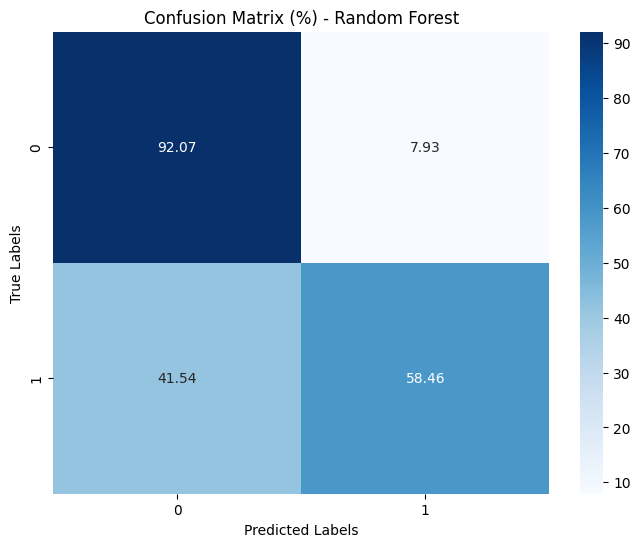

Training and evaluating model: Logistic Regression
Model: Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     27562
           1       0.52      0.62      0.57      7331

    accuracy                           0.80     34893
   macro avg       0.71      0.73      0.72     34893
weighted avg       0.82      0.80      0.81     34893


---------------------------------------------



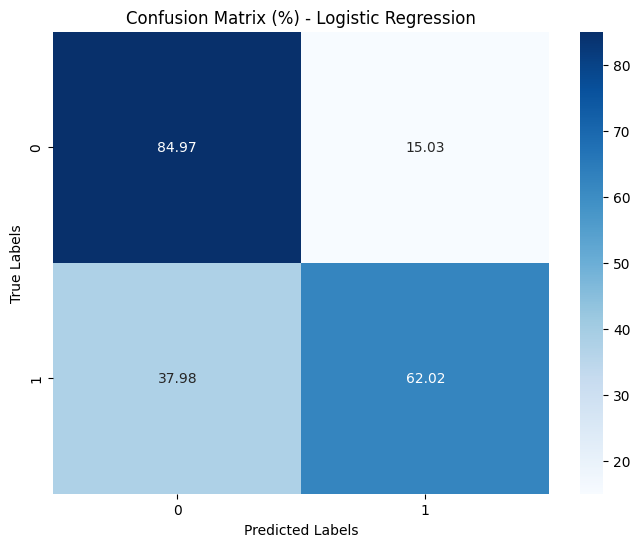

Training and evaluating model: Decision Tree
Model: Decision Tree
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     27562
           1       0.51      0.55      0.53      7331

    accuracy                           0.79     34893
   macro avg       0.69      0.70      0.70     34893
weighted avg       0.80      0.79      0.80     34893


---------------------------------------------



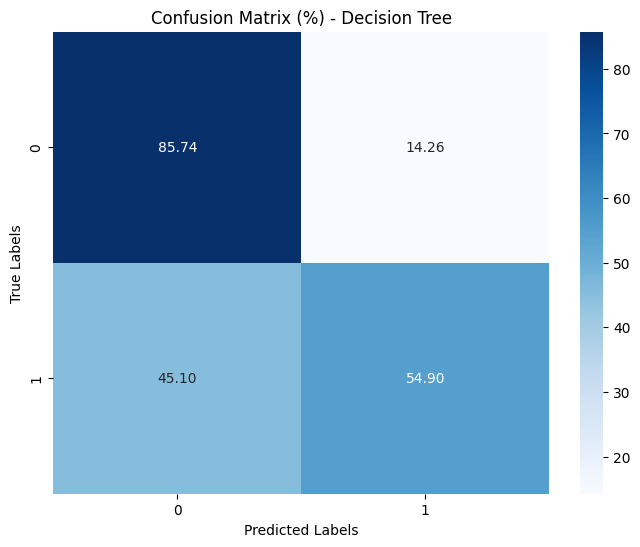

Training and evaluating model: Gradient Boosting
Model: Gradient Boosting
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27562
           1       0.66      0.64      0.65      7331

    accuracy                           0.86     34893
   macro avg       0.78      0.77      0.78     34893
weighted avg       0.85      0.86      0.85     34893


---------------------------------------------



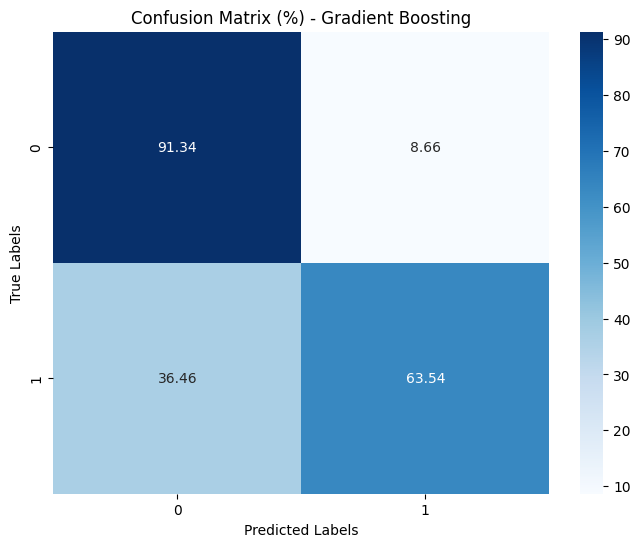

Training and evaluating model: AdaBoost
Model: AdaBoost
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     27562
           1       0.60      0.64      0.62      7331

    accuracy                           0.84     34893
   macro avg       0.75      0.77      0.76     34893
weighted avg       0.84      0.84      0.84     34893


---------------------------------------------



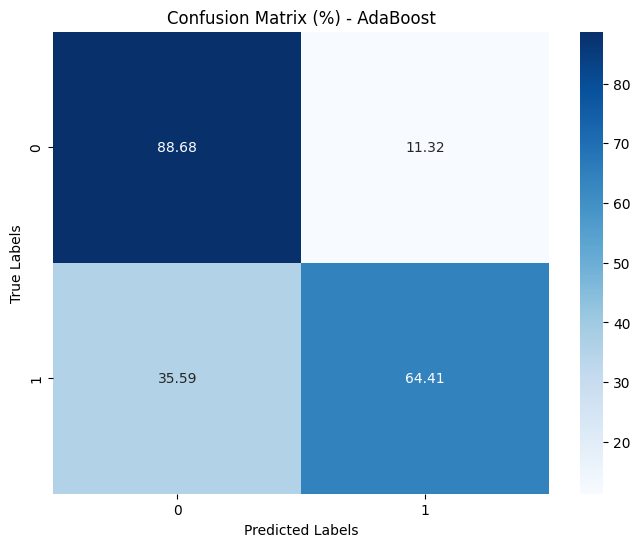

Training and evaluating model: XGBoost
Model: XGBoost
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     27562
           1       0.70      0.60      0.64      7331

    accuracy                           0.86     34893
   macro avg       0.80      0.76      0.78     34893
weighted avg       0.86      0.86      0.86     34893


---------------------------------------------



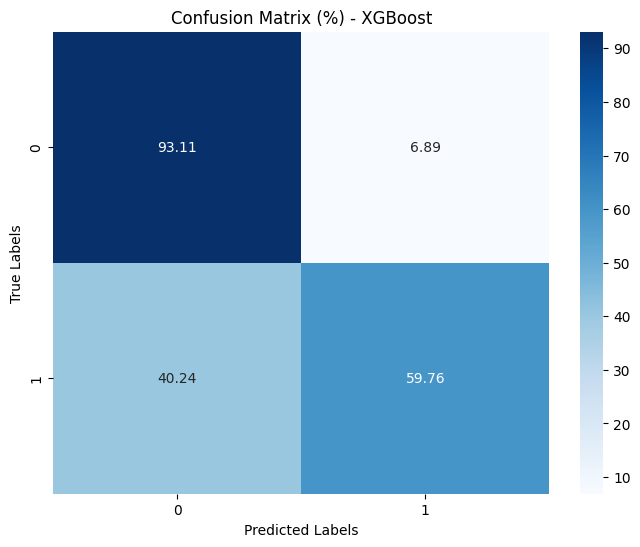

Training and evaluating model: LightGBM
[LightGBM] [Info] Number of positive: 109997, number of negative: 109997
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 219994, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Model: LightGBM
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     27562
           1       0.70      0.60      0.65      7331

    accuracy                           0.86     34893
   macro avg       0.80      0.77      0.78     34893
weighted avg       0.86      0.86      0.86     34893


---------------------------------------------



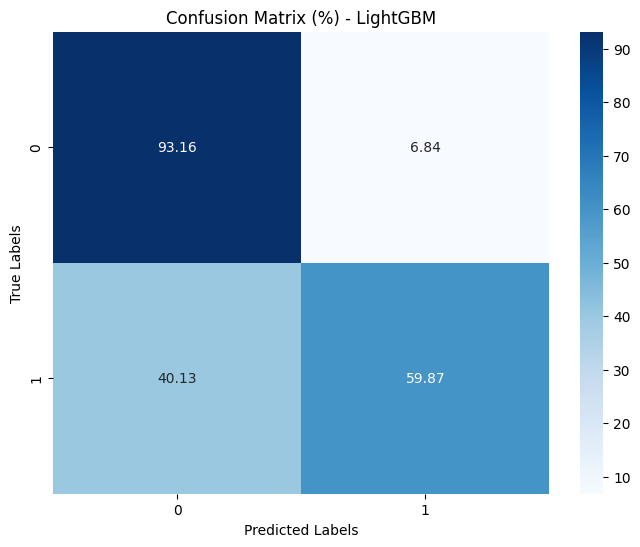

Training and evaluating model: K-Nearest Neighbors
Model: K-Nearest Neighbors
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.66      0.73     27562
           1       0.26      0.44      0.33      7331

    accuracy                           0.61     34893
   macro avg       0.54      0.55      0.53     34893
weighted avg       0.70      0.61      0.64     34893


---------------------------------------------



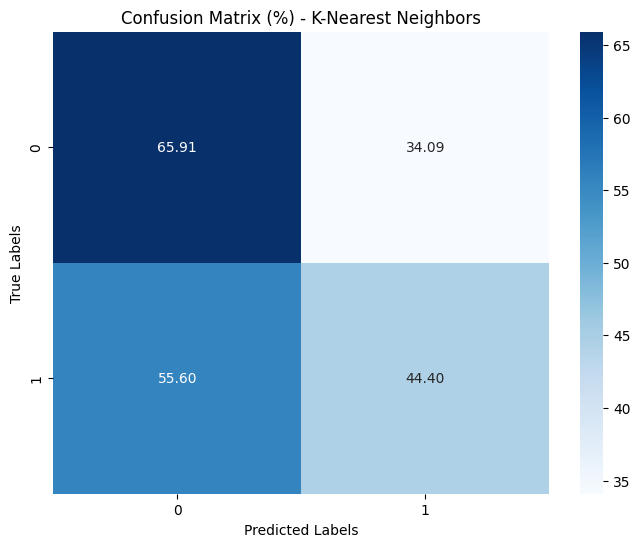

In [ ]:
evaluate_multiple_models(models, X_sm, X_test, y_sm, y_test)

**Results Summary**

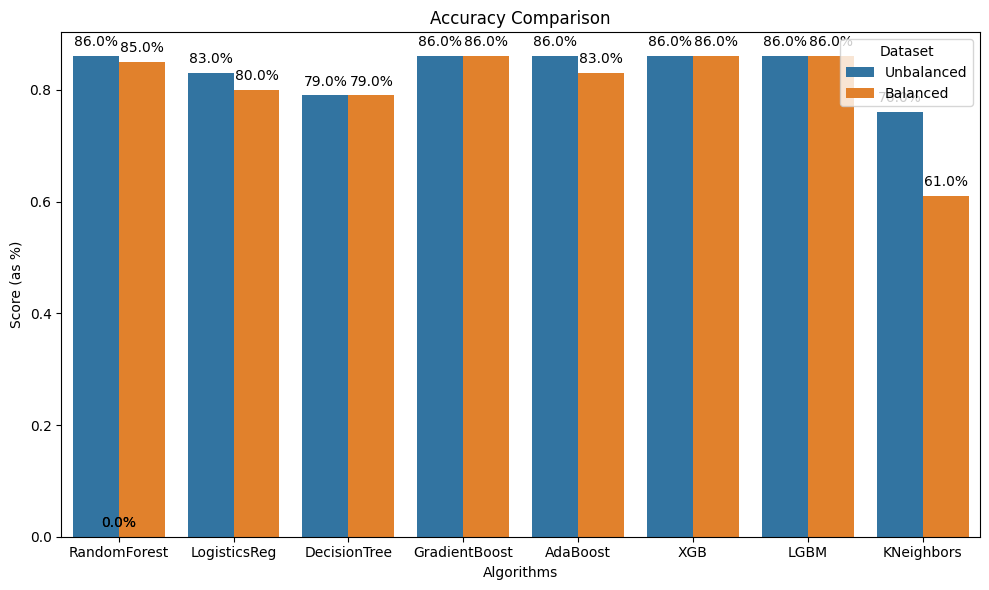

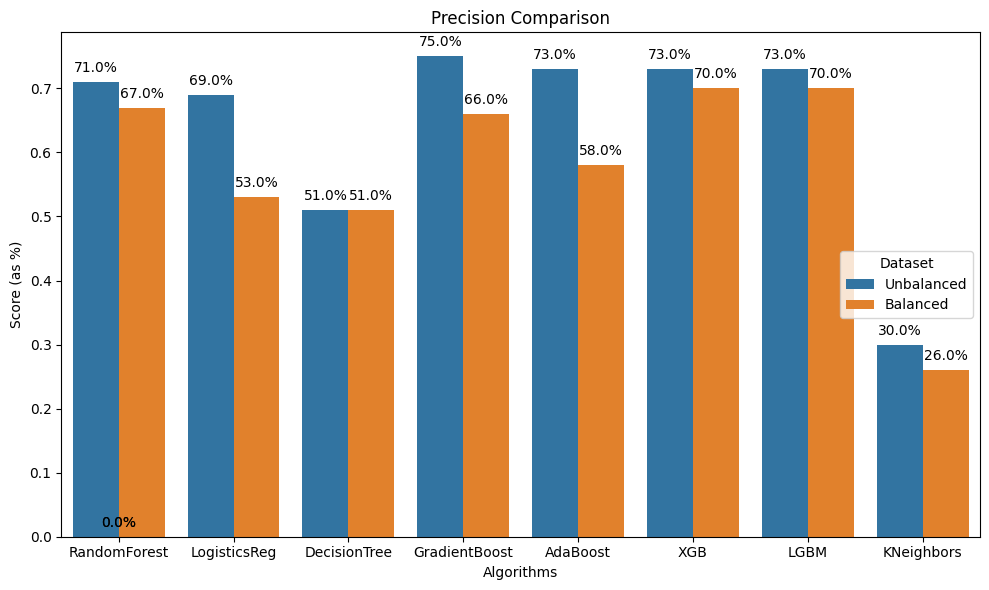

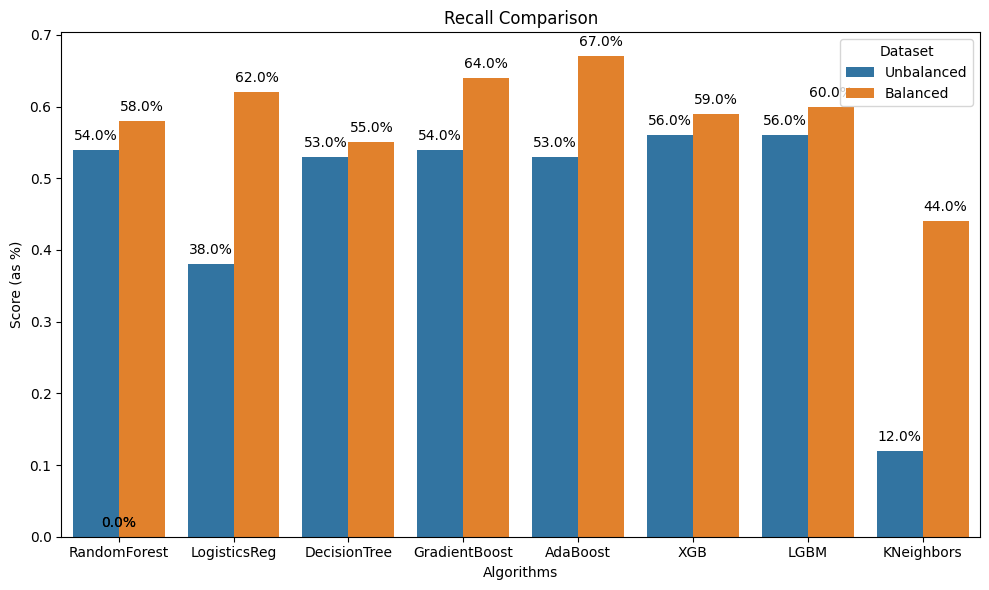

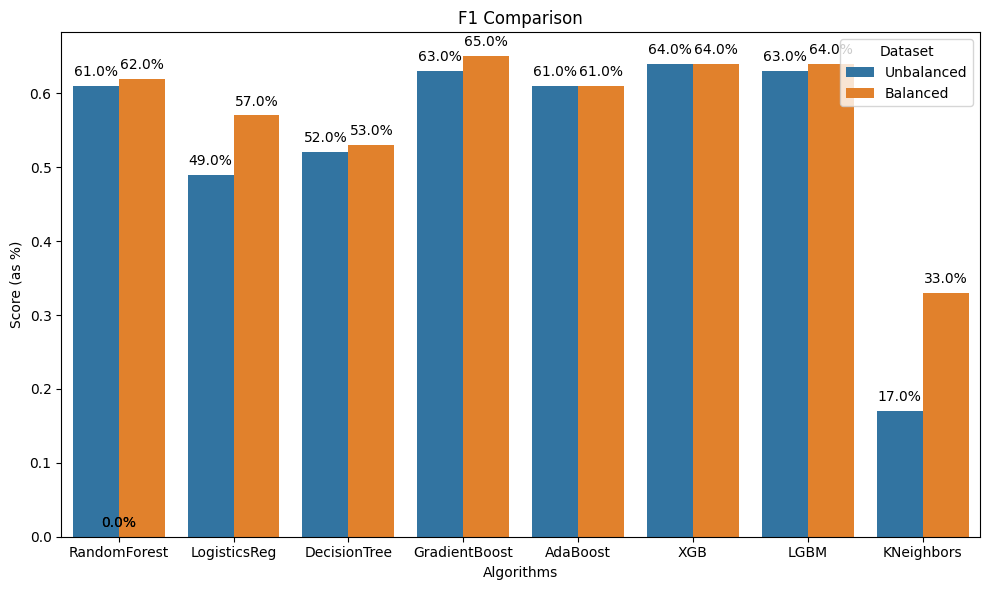

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report, confusion_matrix

results_unbalanced = {
    'RandomForest': {'Accuracy': 0.86, 'Precision': 0.71, 'Recall': 0.54, 'F1': 0.61},
    'LogisticsReg': {'Accuracy': 0.83, 'Precision': 0.69, 'Recall': 0.38, 'F1': 0.49},
    'DecisionTree': {'Accuracy': 0.79, 'Precision': 0.51, 'Recall': 0.53, 'F1': 0.52},
    'GradientBoost': {'Accuracy': 0.86, 'Precision': 0.75, 'Recall': 0.54, 'F1': 0.63},
    'AdaBoost': {'Accuracy': 0.86, 'Precision': 0.73, 'Recall': 0.53, 'F1': 0.61},
    'XGB': {'Accuracy': 0.86, 'Precision': 0.73, 'Recall': 0.56, 'F1': 0.64},
    'LGBM': {'Accuracy': 0.86, 'Precision': 0.73, 'Recall': 0.56, 'F1': 0.63},
    'KNeighbors': {'Accuracy': 0.76, 'Precision': 0.30, 'Recall': 0.12, 'F1': 0.17}

}

results_balanced = {
    'RandomForest': {'Accuracy': 0.85, 'Precision': 0.67, 'Recall': 0.58, 'F1': 0.62},
    'LogisticsReg': {'Accuracy': 0.80, 'Precision': 0.53, 'Recall': 0.62, 'F1': 0.57},
    'DecisionTree': {'Accuracy': 0.79, 'Precision': 0.51, 'Recall': 0.55, 'F1': 0.53},
    'GradientBoost': {'Accuracy': 0.86, 'Precision': 0.66, 'Recall': 0.64, 'F1': 0.65},
    'AdaBoost': {'Accuracy': 0.83, 'Precision': 0.58, 'Recall': 0.67, 'F1': 0.61},
    'XGB': {'Accuracy': 0.86, 'Precision': 0.70, 'Recall': 0.59, 'F1': 0.64},
    'LGBM': {'Accuracy': 0.86, 'Precision': 0.70, 'Recall': 0.60, 'F1': 0.64},
    'KNeighbors': {'Accuracy': 0.61, 'Precision': 0.26, 'Recall': 0.44, 'F1': 0.33}
}

def plot_classification_results_bar(results_unbalanced, results_balanced):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

    # Convert results into DataFrames for unbalanced and balanced datasets
    df_unbalanced = pd.DataFrame(results_unbalanced).T.reset_index().melt(id_vars=['index'], var_name='Metric', value_name='Score')
    df_unbalanced['Dataset'] = 'Unbalanced'

    df_balanced = pd.DataFrame(results_balanced).T.reset_index().melt(id_vars=['index'], var_name='Metric', value_name='Score')
    df_balanced['Dataset'] = 'Balanced'

    # Combine both datasets into one DataFrame
    df = pd.concat([df_unbalanced, df_balanced])
    df.rename(columns={'index': 'Algorithm'}, inplace=True)

    # Loop through each metric to create individual bar plots
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x='Algorithm', y='Score', hue='Dataset', data=df[df['Metric'] == metric], ci=None)

        # Add percentage annotations on top of each bar
        for p in ax.patches:
            percentage = f"{p.get_height() * 100:.1f}%"  # Convert score to percentage
            ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center of the bar
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

        # Set plot labels and title
        plt.xlabel("Algorithms")
        plt.ylabel("Score (as %)")
        plt.title(f"{metric} Comparison")
        plt.xticks(rotation=0, ha='center')
        plt.legend(title='Dataset')
        plt.tight_layout()
        plt.show()
plot_classification_results_bar(results_unbalanced, results_balanced)

Model: Gradient Boosting
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     27562
           1       0.75      0.54      0.63      7331

    accuracy                           0.86     34893
   macro avg       0.82      0.74      0.77     34893
weighted avg       0.86      0.86      0.86     34893


---------------------------------------------



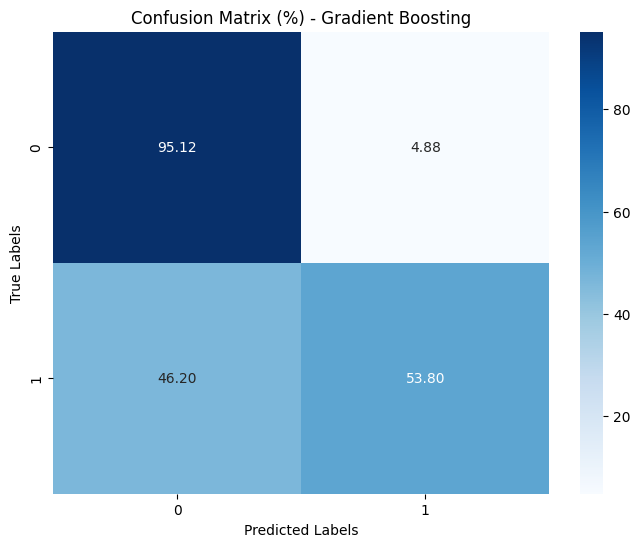

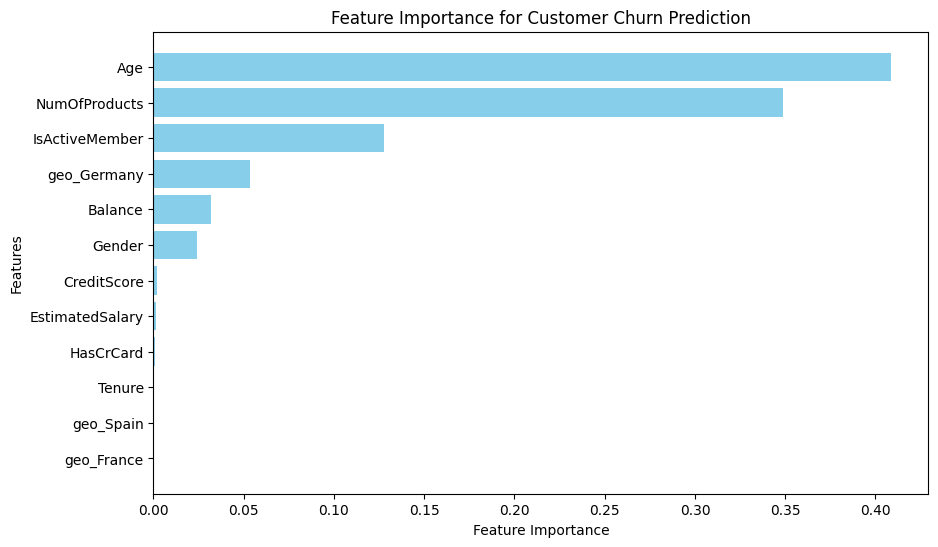

In [ ]:
# Instantiate the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred, "Gradient Boosting")

# Extract feature importance
feature_importance = gb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Customer Churn Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best F1 score: 0.6385825243087724
Model: Gradient Boosting with best parameters
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     27562
           1       0.73      0.56      0.64      7331

    accuracy                           0.86     34893
   macro avg       0.81      0.75      0.78     34893
weighted avg       0.86      0.86      0.86     34893


---------------------------------------------



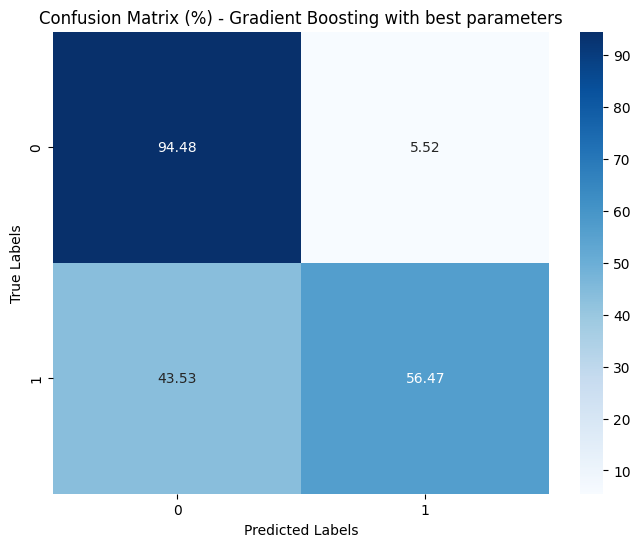

In [ ]:
# prompt: # Best parameter for Gradient Boosting model

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    # Add other hyperparameters you want to tune
}

# Create a GradientBoostingClassifier instance
gb_model = GradientBoostingClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

# Use the best model for prediction
best_gb_model = grid_search.best_estimator_
y_pred = best_gb_model.predict(X_test)
evaluate_model(y_test, y_pred, "Gradient Boosting with best parameters")


In [ ]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

y_rus.value_counts()

,count
Exited,
0,29571
1,29571


Training and evaluating model: Random Forest
Model: Random Forest
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     27562
           1       0.51      0.78      0.61      7331

    accuracy                           0.79     34893
   macro avg       0.72      0.79      0.74     34893
weighted avg       0.84      0.79      0.81     34893


---------------------------------------------



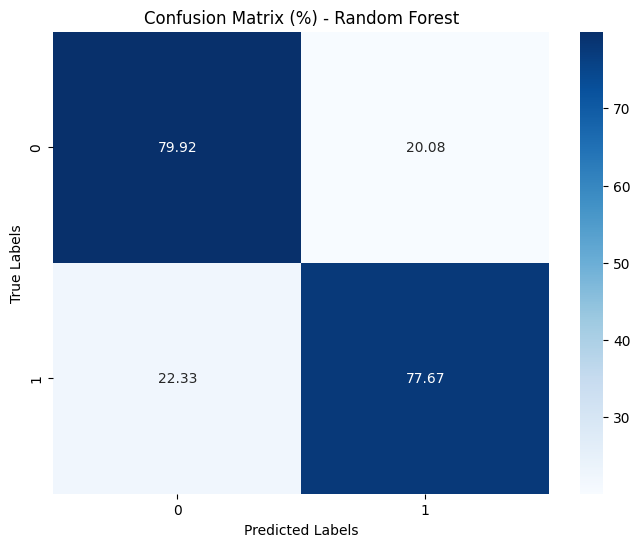

Training and evaluating model: Logistic Regression
Model: Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.75      0.83     27562
           1       0.44      0.74      0.55      7331

    accuracy                           0.75     34893
   macro avg       0.68      0.74      0.69     34893
weighted avg       0.81      0.75      0.77     34893


---------------------------------------------



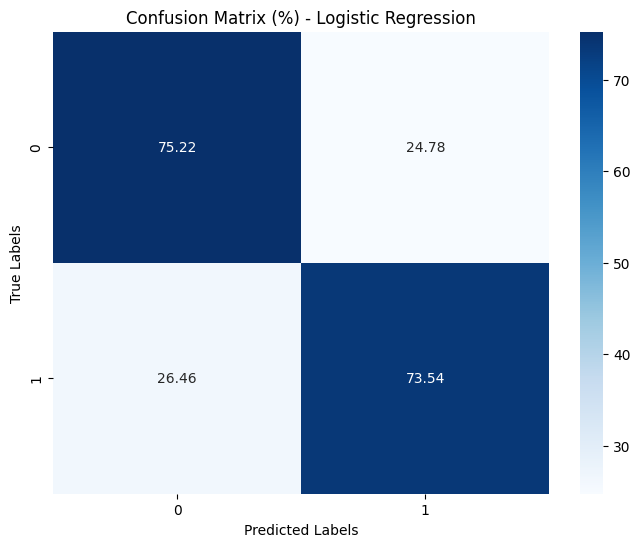

Training and evaluating model: Decision Tree
Model: Decision Tree
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.72      0.80     27562
           1       0.41      0.72      0.52      7331

    accuracy                           0.72     34893
   macro avg       0.66      0.72      0.66     34893
weighted avg       0.80      0.72      0.74     34893


---------------------------------------------



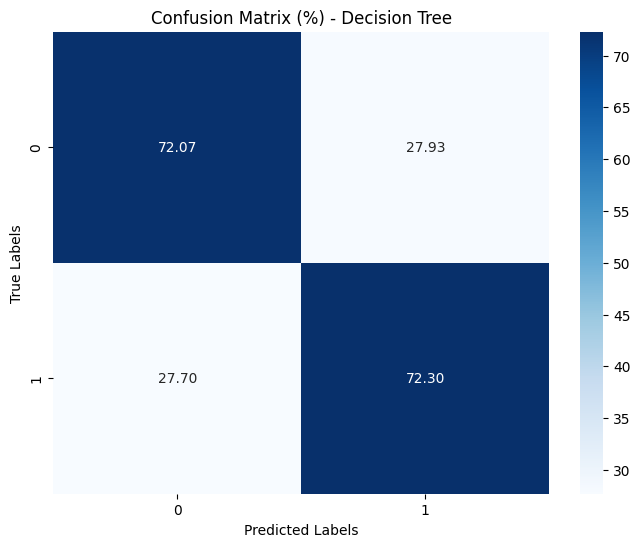

Training and evaluating model: Gradient Boosting
Model: Gradient Boosting
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     27562
           1       0.52      0.79      0.63      7331

    accuracy                           0.81     34893
   macro avg       0.73      0.80      0.75     34893
weighted avg       0.85      0.81      0.82     34893


---------------------------------------------



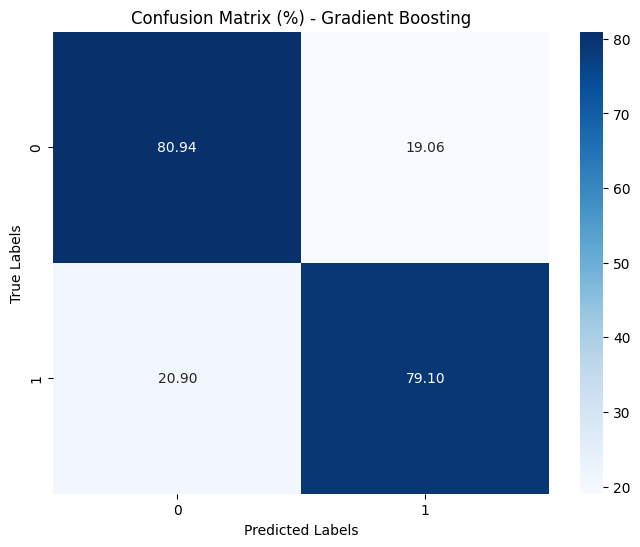

Training and evaluating model: AdaBoost
Model: AdaBoost
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     27562
           1       0.51      0.79      0.62      7331

    accuracy                           0.79     34893
   macro avg       0.72      0.79      0.74     34893
weighted avg       0.84      0.79      0.81     34893


---------------------------------------------



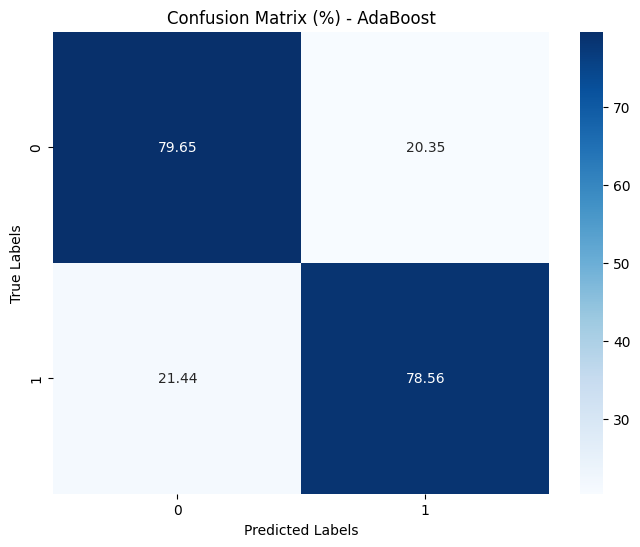

Training and evaluating model: XGBoost
Model: XGBoost
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     27562
           1       0.52      0.79      0.63      7331

    accuracy                           0.80     34893
   macro avg       0.73      0.80      0.75     34893
weighted avg       0.85      0.80      0.82     34893


---------------------------------------------



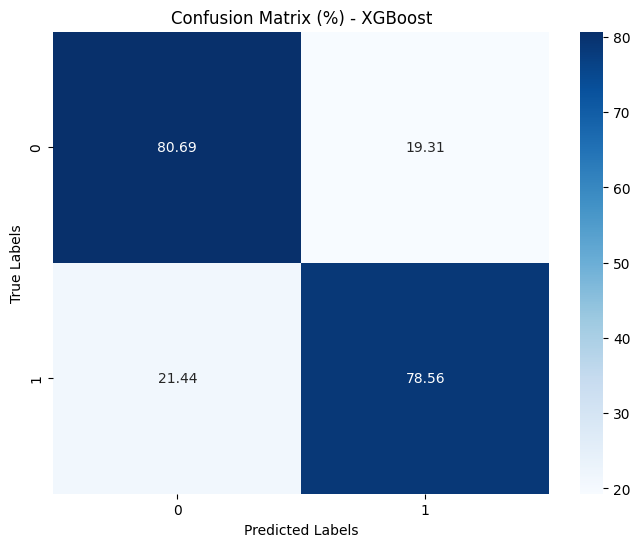

Training and evaluating model: LightGBM
[LightGBM] [Info] Number of positive: 29571, number of negative: 29571
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 59142, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Model: LightGBM
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     27562
           1       0.53      0.79      0.63      7331

    accuracy                           0.81     34893
   macro avg       0.73      0.80      0.75     34893
weighted avg       0.85      0.81      0.82     34893


---------------------------------------------



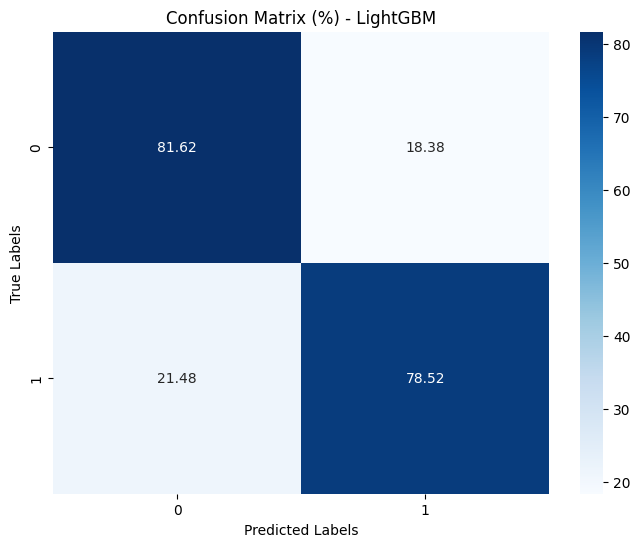

Training and evaluating model: K-Nearest Neighbors
Model: K-Nearest Neighbors
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.56      0.67     27562
           1       0.25      0.55      0.34      7331

    accuracy                           0.56     34893
   macro avg       0.54      0.56      0.51     34893
weighted avg       0.70      0.56      0.60     34893


---------------------------------------------



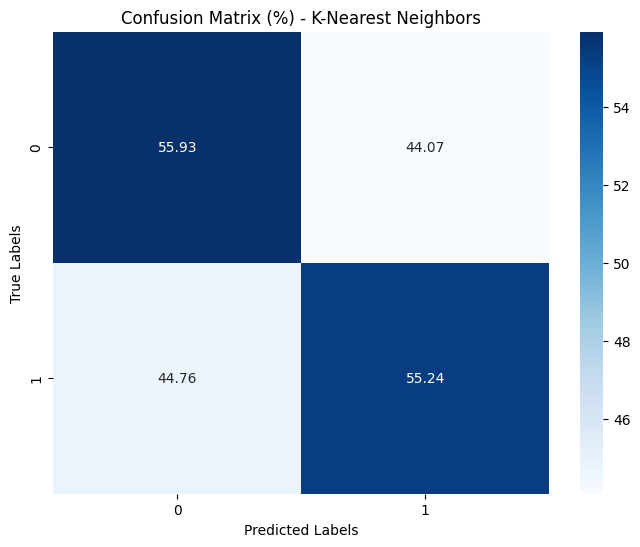

In [ ]:
evaluate_multiple_models(models, X_rus, X_test, y_rus, y_test)

Exited
1    112114
0    109997
Name: count, dtype: int64
Training and evaluating model: Random Forest
Model: Random Forest
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     27562
           1       0.67      0.58      0.62      7331

    accuracy                           0.85     34893
   macro avg       0.78      0.75      0.77     34893
weighted avg       0.85      0.85      0.85     34893


---------------------------------------------



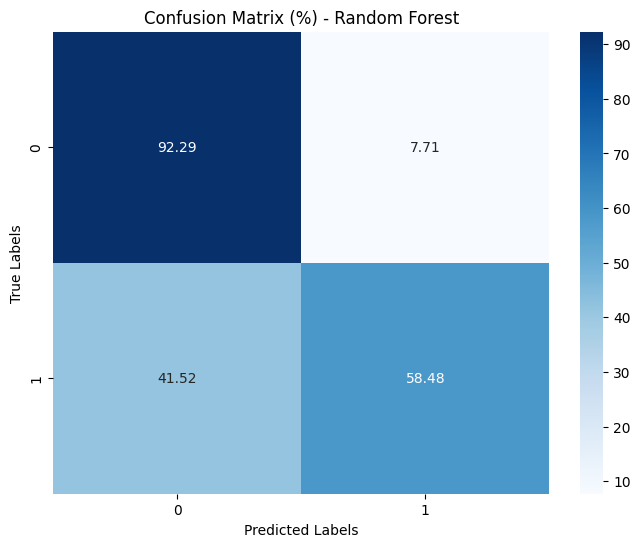

Training and evaluating model: Logistic Regression
Model: Logistic Regression
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     27562
           1       0.53      0.62      0.57      7331

    accuracy                           0.80     34893
   macro avg       0.71      0.73      0.72     34893
weighted avg       0.82      0.80      0.81     34893


---------------------------------------------



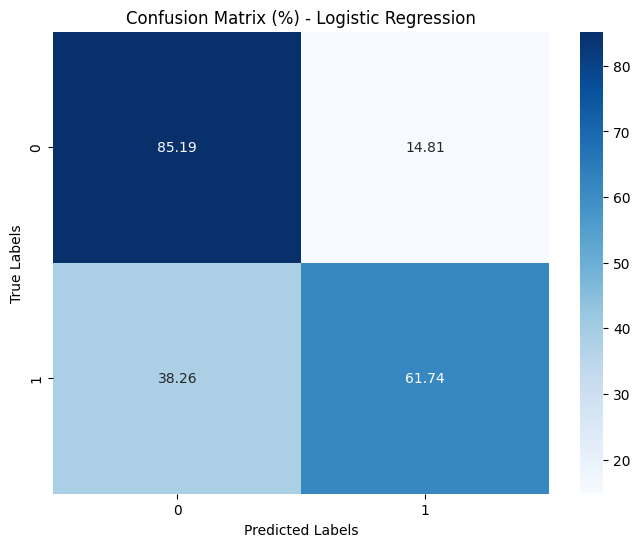

Training and evaluating model: Decision Tree
Model: Decision Tree
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     27562
           1       0.51      0.55      0.53      7331

    accuracy                           0.79     34893
   macro avg       0.69      0.70      0.70     34893
weighted avg       0.80      0.79      0.80     34893


---------------------------------------------



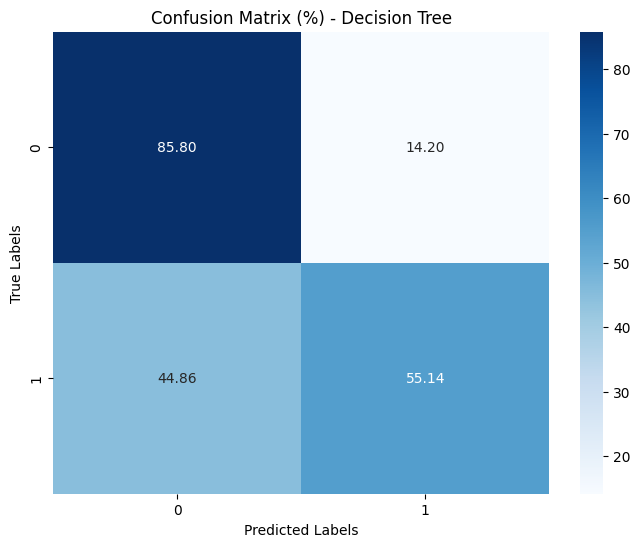

Training and evaluating model: Gradient Boosting
Model: Gradient Boosting
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     27562
           1       0.66      0.64      0.65      7331

    accuracy                           0.85     34893
   macro avg       0.78      0.78      0.78     34893
weighted avg       0.85      0.85      0.85     34893


---------------------------------------------



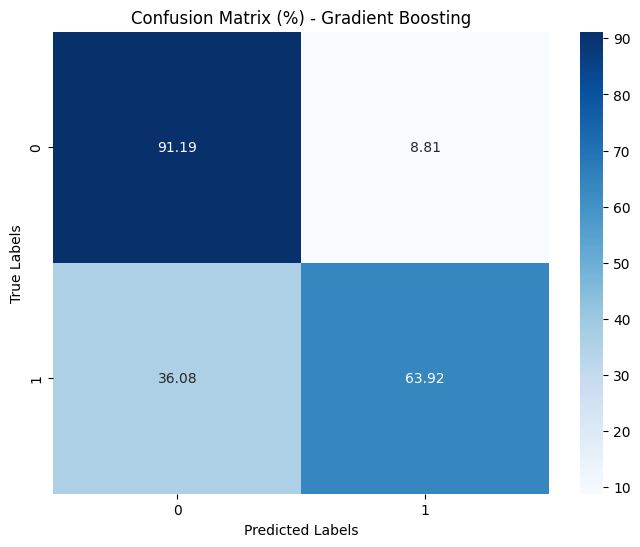

Training and evaluating model: AdaBoost
Model: AdaBoost
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     27562
           1       0.59      0.66      0.62      7331

    accuracy                           0.83     34893
   macro avg       0.75      0.77      0.76     34893
weighted avg       0.84      0.83      0.84     34893


---------------------------------------------



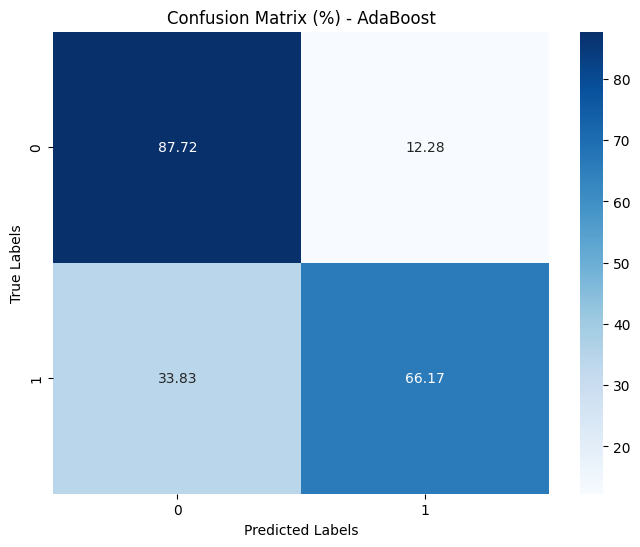

Training and evaluating model: XGBoost
Model: XGBoost
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     27562
           1       0.70      0.59      0.64      7331

    accuracy                           0.86     34893
   macro avg       0.80      0.76      0.78     34893
weighted avg       0.85      0.86      0.86     34893


---------------------------------------------



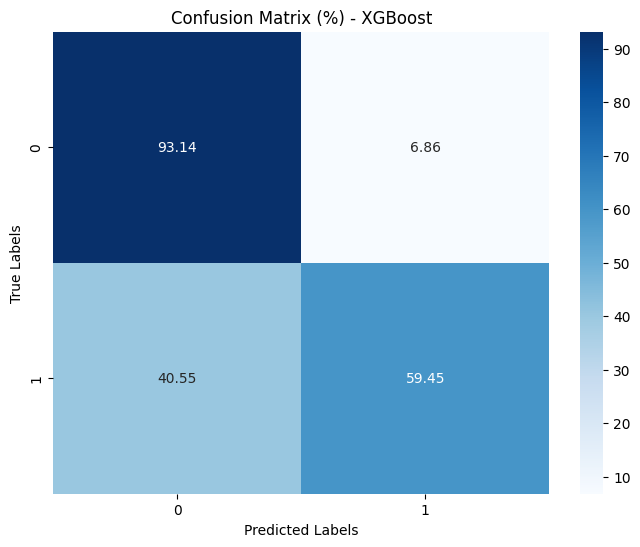

Training and evaluating model: LightGBM
[LightGBM] [Info] Number of positive: 112114, number of negative: 109997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 222111, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504766 -> initscore=0.019063
[LightGBM] [Info] Start training from score 0.019063
Model: LightGBM
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     27562
           1       0.70      0.60      0.64      7331

    accuracy                           0.86     34893
   macro avg       0.80      0.76      0.78     34893
weighted avg       0.86      0.86      0.86     34893


-----------------------------------

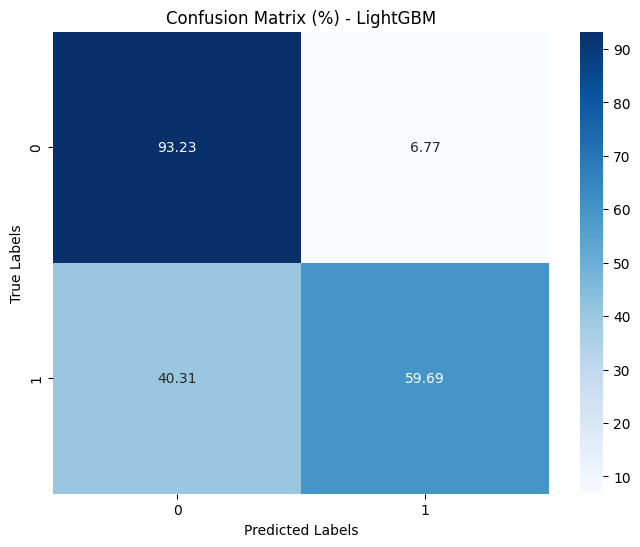

Training and evaluating model: K-Nearest Neighbors
Model: K-Nearest Neighbors
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.63      0.71     27562
           1       0.25      0.47      0.33      7331

    accuracy                           0.59     34893
   macro avg       0.54      0.55      0.52     34893
weighted avg       0.70      0.59      0.63     34893


---------------------------------------------



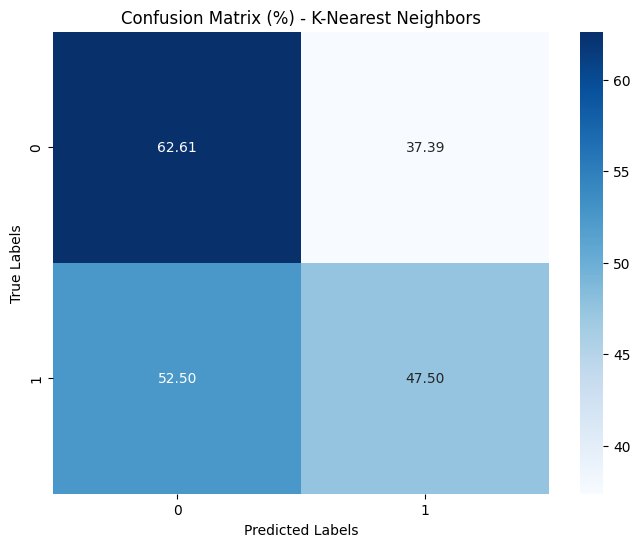

In [ ]:
# prompt: apply other balancing technique adsyn

from imblearn.over_sampling import ADASYN

# Instantiate ADASYN
adasyn = ADASYN(random_state=42)

# Apply ADASYN to the training data
X_ad, y_ad = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after ADASYN
print(y_ad.value_counts())

# Evaluate models with the ADASYN-balanced data
evaluate_multiple_models(models, X_ad, X_test, y_ad, y_test)
